In [504]:
import pandas as pd
import numpy as np

from tabulate import tabulate

import re

# I. Nhập và chuyển đổi dữ liệu

In [505]:
def col_order(data,col,des):
    col_index=data.columns.get_loc(des)
    data.insert(col_index,col,data.pop(col))

In [506]:
def check(data):
    dict={}
    for col in data.columns:
        dtype = data[col].dtypes
        valid_instances = data[col].count()
        unique = data[col].nunique()
        null_count = data[col].isnull().sum()
        duplicates = data[col].duplicated().sum()
        dict[col] = dtype,valid_instances,unique,null_count,duplicates
        data_check = pd.DataFrame(dict, index=["dtype","valid_instances","unique","sum_null","duplicates"]).T
    return data_check

In [507]:
def check_unique(data):
    nunique=data.apply(lambda col: col.nunique())
    unique_values = data.apply(lambda col: col.unique())
    data_check = pd.DataFrame({'uni_count': nunique, 'unique_values': unique_values})
    return data_check

In [508]:

def outlier_check(data):
    outliers = {}

    for col in data.select_dtypes(include=np.number).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        col_outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers[col] = col_outliers


    print("Summary Statistics:")
    print(tabulate(data.describe().T, headers='keys', tablefmt='pretty') + "\n\n")

    for col, outlier_data in outliers.items():
        if len(outlier_data) == 0:
            continue
        else:
            print(f"Outliers in {col}:", len(outlier_data))
            print(tabulate(outlier_data.head(), headers='keys', tablefmt='pretty') + "\n")


In [509]:
data = pd.read_excel("Khảo sát Ảnh hưởng của hoạt động CSR tới hoạt động đồng tạo giá trị của ngành may mặc - nghiên cứu nhãn hãng Uniqlo  (Responses).xlsx", engine='openpyxl')

In [510]:
data.head()

Timestamp Tuổi của bạn Giới tính Thu nhập hàng tháng của bạn  \
0 2024-04-07 12:49:44.039      18 - 25        Nữ               Dưới 10 triệu   
1 2024-04-07 12:54:01.036      18 - 25        Nữ               Dưới 10 triệu   
2 2024-04-07 12:56:03.012      18 - 25       Nam            Chưa có thu nhập   
3 2024-04-08 16:11:24.287      18 - 25        Nữ            Chưa có thu nhập   
4 2024-04-08 16:13:08.953      18 - 25        Nữ            Chưa có thu nhập   

   Mức độ Tìm kiếm thông tin của bạn (Đánh giá mức độ từ 1 đến 7, với 1 - "Hoàn toàn không đồng ý" và 7 - "Hoàn toàn đồng ý")  [Tôi đã hỏi về thông tin của sản phẩm ]  \
0                                                  7                                                                                                                     
1                                                  7                                                                                                                     
2                                                  2                                                                                                                     
3                                                  3                                                                                                                     
4                                                  5                                                                                                                     

   Mức độ Tìm kiếm thông tin của bạn (Đánh giá mức độ từ 1 đến 7, với 1 - "Hoàn toàn không đồng ý" và 7 - "Hoàn toàn đồng ý")  [Tôi đã tìm hiểu về địa điểm bán hàng]  \
0                                                  4                                                                                                                    
1                                                  5                                                                                                                    
2                                                  4                                                                                                                    
3                                                  3                                                                                                                    
4                                                  5                                                                                                                    

   Mức độ Tìm kiếm thông tin của bạn (Đánh giá mức độ từ 1 đến 7, với 1 - "Hoàn toàn không đồng ý" và 7 - "Hoàn toàn đồng ý")  [Tôi chú ý đến cách người khác sử dụng sản phẩm/dịch vụ sao cho đúng nhất]  \
0                                                  5                                                                                                                                                        
1                                                  4                                                                                                                                                        
2                                                  4                                                                                                                                                        
3                                                  2                                                                                                                                                        
4                                                  5                                                                                                                                                        

   Mức độ Chia sẻ thông tin của bạn (Đánh giá mức độ từ 1 đến 7, với 1 - "Hoàn toàn không đồng ý" và 7 - "Hoàn toàn đồng ý")  [Tôi đã cung cấp thông tin chính xác cho nhân viên]  \
0                                                  7                                   

In [511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 40 columns):
 #   Column                                                                                                                                                                                                                                                                                          Non-Null Count  Dtype         
---  ------                                                                                                                                                                                                                                                                                          --------------  -----         
 0   Timestamp                                                                                                                                                                                                                                         

In [512]:
import re

pattern = r"(?<=\[)(.*?)\]$"

new_name_col = []
for col in data.columns[4:]:
    match = re.search(pattern, col)
    if match:
        col_new = match.group(1).strip()
        new_name_col.append(col_new)
        print(col_new)
    else:
        new_name_col.append(col)

data.rename(columns=dict(zip(data.columns[4:], new_name_col)), inplace=True)


Tôi đã hỏi về thông tin của sản phẩm
Tôi đã tìm hiểu về địa điểm bán hàng
Tôi chú ý đến cách người khác sử dụng sản phẩm/dịch vụ sao cho đúng nhất
Tôi đã cung cấp thông tin chính xác cho nhân viên
Tôi đã cung cấp thông tin cần thiết cho nhân viên để họ hoàn thành công việc
Tôi đã trả lời các câu hỏi liên quan đến dịch vụ từ nhân viên
Tôi đã ứng xử đúng theo yêu cầu của nhân viên
Tôi đã hoàn thành trách nhiệm đối với Doanh nghiệp
Tôi đã làm theo hướng dẫn và yêu cầu của nhân viên
Tôi thân thiện với nhân viên
Tôi tử tế với nhân viên
Tôi không cư xử thô lỗ với nhân viên
Nếu có ý tưởng hữu ích để cải thiện dịch vụ, tôi sẽ cho nhân viên biết
Khi nhận được dịch vụ tốt, tôi sẽ phản hồi lại
Khi gặp vấn đề, tôi sẽ cho nhân viên biết
Tôi đã chia sẻ tích cực về sản phẩm Uniqlo với người khác
Tôi đã giới thiệu sản phẩm Uniqlo cho người khác
Tôi khuyến khích bạn bè và người thân sử dụng sản phẩm Uniqlo
Tôi giúp đỡ khách hàng khác nếu họ gặp vấn đề
Tôi hướng dẫn khách hàng khác sử dụng sản phẩm
Tôi 

In [513]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 40 columns):
 #   Column                                                                                           Non-Null Count  Dtype         
---  ------                                                                                           --------------  -----         
 0   Timestamp                                                                                        103 non-null    datetime64[ns]
 1   Tuổi của bạn                                                                                     103 non-null    object        
 2   Giới tính                                                                                        103 non-null    object        
 3   Thu nhập hàng tháng của bạn                                                                      103 non-null    object        
 4   Tôi đã hỏi về thông tin của sản phẩm                                                        

In [514]:
"""
start_col 1: Tôi đã hỏi về thông tin của sản phẩm
end_col 1: Nếu phải đợi lâu hơn bình thường, tôi sẵn sàng thích nghi

start_col 2: Thiết lập quy trình giải quyết khiếu nại của khách hàng 
end_col 2: Quan tâm đến việc tôn trọng và bảo vệ môi trường tự nhiên

"""

'\nstart_col 1: Tôi đã hỏi về thông tin của sản phẩm\nend_col 1: Nếu phải đợi lâu hơn bình thường, tôi sẵn sàng thích nghi\n\nstart_col 2: Thiết lập quy trình giải quyết khiếu nại của khách hàng \nend_col 2: Quan tâm đến việc tôn trọng và bảo vệ môi trường tự nhiên\n\n'

In [515]:
new_tables=[]
for i in range(int(input("Number of table to split: ").strip())):
    start_col_index = data.columns.get_loc(input("input your start col: ").strip())
    end_col_index = data.columns.get_loc(input("input your end col: ").strip())
    splitted_table = data.iloc[:,start_col_index:end_col_index+1]

    new_tables.append(splitted_table)

In [516]:
vcc_data = new_tables[0]
csr_data = new_tables[1]
res_data = data.iloc[:,:4].drop("Timestamp",axis=1)

In [517]:
res_data.head()

Tuổi của bạn Giới tính Thu nhập hàng tháng của bạn
0      18 - 25        Nữ               Dưới 10 triệu
1      18 - 25        Nữ               Dưới 10 triệu
2      18 - 25       Nam            Chưa có thu nhập
3      18 - 25        Nữ            Chưa có thu nhập
4      18 - 25        Nữ            Chưa có thu nhập

In [518]:
vcc_data.head()

Tôi đã hỏi về thông tin của sản phẩm  Tôi đã tìm hiểu về địa điểm bán hàng  \
0                                     7                                     4   
1                                     7                                     5   
2                                     2                                     4   
3                                     3                                     3   
4                                     5                                     5   

   Tôi chú ý đến cách người khác sử dụng sản phẩm/dịch vụ sao cho đúng nhất  \
0                                                  5                          
1                                                  4                          
2                                                  4                          
3                                                  2                          
4                                                  5                          

   Tôi đã cung cấp thông tin chính xác cho nhân viên  \
0                                                  7   
1                                                  7   
2                                                  7   
3                                                  1   
4                                                  5   

   Tôi đã cung cấp thông tin cần thiết cho nhân viên để họ hoàn thành công việc  \
0                                                  7                              
1                                                  7                              
2                                                  6                              
3                                                  2                              
4                                                  5                              

   Tôi đã trả lời các câu hỏi liên quan đến dịch vụ từ nhân viên  \
0                                                  7               
1                                                  7               
2                                                  4               
3                                                  2               
4                                                  5               

   Tôi đã ứng xử đúng theo yêu cầu của nhân viên  \
0                                              7   
1                                              7   
2                                              7   
3                                              4   
4                                              6   

   Tôi đã hoàn thành trách nhiệm đối với Doanh nghiệp  \
0                                                  7    
1                                                  7    
2                                                  6    
3                                                  4    
4                                                  6    

   Tôi đã làm theo hướng dẫn và yêu cầu của nhân viên  \
0                                                  7    
1                                                  7    
2                                                  6    
3                                                  4    
4                                                  6    

   Tôi thân thiện với nhân viên  ...  \
0                             7  ...   
1                             7  ...   
2                             7  ...   
3                             4  ...   
4                             7  ...   

   Khi gặp vấn đề, tôi sẽ cho nhân viên biết  \
0                                          7   
1                                          6   
2                                          4   
3                                          3   
4                                          6   

   Tôi đã chia sẻ tích cực về sản phẩm Uniqlo với người khác  \
0                                                  7           
1                                                  5           
2                                                  3           
3          

In [519]:
csr_data.head()

Thiết lập quy trình giải quyết khiếu nại của khách hàng  \
0                                                  7         
1                                                  7         
2                                                  5         
3                                                  2         
4                                                  5         

   Đối xử trung thực với khách hàng  \
0                                 7   
1                                 5   
2                                 5   
3                                 4   
4                                 5   

   Có đội ngũ nhân viên cung cấp thông tin đầy đủ về sản phẩm / dịch vụ của công ty cho khách hàng  \
0                                                  7                                                 
1                                                  7                                                 
2                                                  7                                                 
3                                                  4                                                 
4                                                  5                                                 

   Dựa vào mức độ hài lòng của khách hàng để cải thiện sản phẩm/dịch vụ  \
0                                                  5                      
1                                                  5                      
2                                                  6                      
3                                                  4                      
4                                                  5                      

   Nỗ lực tìm hiểu nhu cầu của khách hàng  \
0                                       3   
1                                       2   
2                                       7   
3                                       4   
4                                       5   

   Đảm bảo an toàn lao động cho nhân viên  Đối xử công bằng với nhân viên  \
0                                       4                               5   
1                                       6                               5   
2                                       6                               5   
3                                       3                               3   
4                                       5                               5   

   Cung cấp môi trường làm việc thoải mái (ví dụ: giờ làm việc linh hoạt, hòa giải)  \
0                                                  5                                  
1                                                  7                                  
2                                                  5                                  
3                                                  3                                  
4                                                  5                                  

   Góp phần giải quyết các vấn đề xã hội  \
0                                      3   
1                                      4   
2                                      5   
3                                      2   
4                                      5   

   Từ thiện để cải thiện tình trạng nhóm yếu thế trong xã hội  \
0                                                  4            
1                                                  4            
2                                                  6            
3                                                  2            
4                                                  5            

   Góp tiền cho các sự kiện văn hóa và xã hội (ví dụ: âm nhạc, thể thao)  \
0                                                  2                       
1                                                  3                       
2                                                  5                       
3                                                  3                       
4                                     

# II. Phân tích dữ liệu mô tả

## 1. Thông tin cơ bản về nhóm người tham gia khảo sát

In [520]:
res_data.head()

Tuổi của bạn Giới tính Thu nhập hàng tháng của bạn
0      18 - 25        Nữ               Dưới 10 triệu
1      18 - 25        Nữ               Dưới 10 triệu
2      18 - 25       Nam            Chưa có thu nhập
3      18 - 25        Nữ            Chưa có thu nhập
4      18 - 25        Nữ            Chưa có thu nhập

In [521]:
pd.set_option("display.max_colwidth",None)

In [522]:
check_unique(res_data)

uni_count  \
Tuổi của bạn                         3   
Giới tính                            3   
Thu nhập hàng tháng của bạn          4   

                                                                                     unique_values  
Tuổi của bạn                                                           [18 - 25, 16 - 18, Trên 25]  
Giới tính                                                                          [Nữ, Nam, Khác]  
Thu nhập hàng tháng của bạn  [Dưới 10 triệu, Chưa có thu nhập, 10 triệu - 20 triệu, Trên 20 triệu]

In [523]:
pd.reset_option("display.max_colwidth",None)

In [524]:
data[["Tuổi của bạn","Giới tính"]].value_counts()

Tuổi của bạn  Giới tính
18 - 25       Nữ           69
              Nam          25
16 - 18       Nam           3
              Nữ            2
Trên 25       Nữ            2
18 - 25       Khác          1
Trên 25       Nam           1
Name: count, dtype: int64

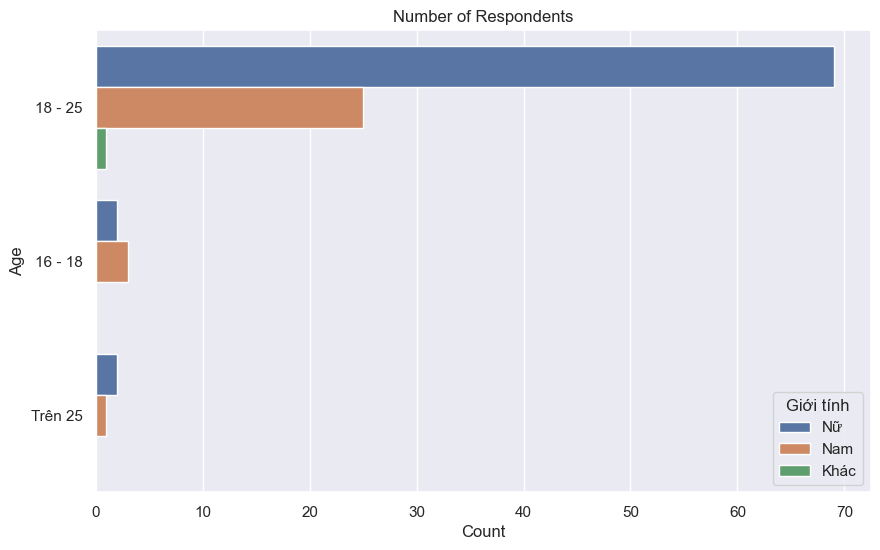

In [525]:
ag_data=res_data[["Tuổi của bạn", "Giới tính"]].value_counts(ascending=False).reset_index()

plt.figure(figsize=(10,6))

sns.set(font_scale=1)
# Create the bar plot
sns.barplot(x="count", y="Tuổi của bạn", hue="Giới tính", data=ag_data, orient="h")

plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Number of Respondents')

plt.show()


## 2. Khảo sát về việc đồng tạo ra giá trị của khách hàng đối với Uniqlo

### 2.1 Analyze Values for Each Sub-Factors of VCC

In [526]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [527]:
vcc_data

Tôi đã hỏi về thông tin của sản phẩm  \
0                                       7   
1                                       7   
2                                       2   
3                                       3   
4                                       5   
..                                    ...   
98                                      4   
99                                      6   
100                                     4   
101                                     7   
102                                     2   

     Tôi đã tìm hiểu về địa điểm bán hàng  \
0                                       4   
1                                       5   
2                                       4   
3                                       3   
4                                       5   
..                                    ...   
98                                      4   
99                                      5   
100                                     4   
101                                     7   
102                                     1   

     Tôi chú ý đến cách người khác sử dụng sản phẩm/dịch vụ sao cho đúng nhất  \
0                                                    5                          
1                                                    4                          
2                                                    4                          
3                                                    2                          
4                                                    5                          
..                                                 ...                          
98                                                   4                          
99                                                   7                          
100                                                  5                          
101                                                  7                          
102                                                  3                          

     Tôi đã cung cấp thông tin chính xác cho nhân viên  \
0                                                    7   
1                                                    7   
2                                                    7   
3                                                    1   
4                                                    5   
..                                                 ...   
98                                                   2   
99                                                   5   
100                                                  5   
101                                                  4   
102                                                  3   

     Tôi đã cung cấp thông tin cần thiết cho nhân viên để họ hoàn thành công việc  \
0                                                    7                              
1                                                    7                              
2                                                    6                              
3                                                    2                              
4                                                    5                              
..                                                 ...                              
98                                                   2                              
99                                                   4                              
100                                                  5                              
101                                                  4                              
102                                                  3                              

     Tôi đã trả lời các câu hỏi liên quan đến dịch vụ từ nhân viên  \
0                                                    7               
1                                                    7               
2                     

In [528]:
check(vcc_data)

dtype valid_instances  \
Tôi đã hỏi về thông tin của sản phẩm                int64             103   
Tôi đã tìm hiểu về địa điểm bán hàng                int64             103   
Tôi chú ý đến cách người khác sử dụng sản phẩm/...  int64             103   
Tôi đã cung cấp thông tin chính xác cho nhân viên   int64             103   
Tôi đã cung cấp thông tin cần thiết cho nhân vi...  int64             103   
Tôi đã trả lời các câu hỏi liên quan đến dịch v...  int64             103   
Tôi đã ứng xử đúng theo yêu cầu của nhân viên       int64             103   
Tôi đã hoàn thành trách nhiệm đối với Doanh nghiệp  int64             103   
Tôi đã làm theo hướng dẫn và yêu cầu của nhân viên  int64             103   
Tôi thân thiện với nhân viên                        int64             103   
Tôi tử tế với nhân viên                             int64             103   
Tôi không cư xử thô lỗ với nhân viên                int64             103   
Nếu có ý tưởng hữu ích để cải thiện dịch vụ, tô...  int64             103   
Khi nhận được dịch vụ tốt, tôi sẽ phản hồi lại      int64             103   
Khi gặp vấn đề, tôi sẽ cho nhân viên biết           int64             103   
Tôi đã chia sẻ tích cực về sản phẩm Uniqlo với ...  int64             103   
Tôi đã giới thiệu sản phẩm Uniqlo cho người khác    int64             103   
Tôi khuyến khích bạn bè và người thân sử dụng s...  int64             103   
Tôi giúp đỡ khách hàng khác nếu họ gặp vấn đề       int64             103   
Tôi hướng dẫn khách hàng khác sử dụng sản phẩm      int64             103   
Tôi tư vấn cho khách hàng khác                      int64             103   
Nếu dịch vụ không được như mong đợi, tôi sẵn sà...  int64             103   
Nếu nhân viên mắc lỗi, tôi sẵn sàng kiên nhẫn       int64             103   
Nếu phải đợi lâu hơn bình thường, tôi sẵn sàng ...  int64             103   

                                                   unique sum_null duplicates  
Tôi đã hỏi về thông tin của sản phẩm                    7        0         96  
Tôi đã tìm hiểu về địa điểm bán hàng                    7        0         96  
Tôi chú ý đến cách người khác sử dụng sản phẩm/...      7        0         96  
Tôi đã cung cấp thông tin chính xác cho nhân viên       7        0         96  
Tôi đã cung cấp thông tin cần thiết cho nhân vi...      7        0         96  
Tôi đã trả lời các câu hỏi liên quan đến dịch v...      7        0         96  
Tôi đã ứng xử đúng theo yêu cầu của nhân viên           6        0         97  
Tôi đã hoàn thành trách nhiệm đối với Doanh nghiệp      7        0         96  
Tôi đã làm theo hướng dẫn và yêu cầu của nhân viên      7        0         96  
Tôi thân thiện với nhân viên                            6        0         97  
Tôi tử tế với nhân viên                                 7        0         96  
Tôi không cư xử thô lỗ với nhân viên                    6        0         97  
Nếu có ý tưởng hữu ích để cải thiện dịch vụ, tô...      7        0         96  
Khi nhận được dịch vụ tốt, tôi sẽ phản hồi lại          7        0         96  
Khi gặp vấn đề, tôi sẽ cho nhân viên biết               6        0         97  
Tôi đã chia sẻ tích cực về sản phẩm Uniqlo với ...      7        0         96  
Tôi đã giới thiệu sản phẩm Uniqlo cho người khác        7        0         96  
Tôi khuyến khích bạn bè và người thân sử dụng s...      7        0         96  
Tôi giúp đỡ khách hàng khác nếu họ gặp vấn đề           7        0         96  
Tôi hướng dẫn khách hàng khác sử dụng sản phẩm          7        0         96  
Tôi tư vấn cho khách hàng khác                          7        0         96  
Nếu dịch vụ không được như mong đợi, tôi sẵn sà...      7        0         96  
Nếu nhân viên mắc lỗi, tôi sẵn sàng kiên nhẫn           7        0         96  
Nếu phải đợi lâu hơn bình thường, tôi sẵn sàng ...      7        0         96

In [529]:
check_unique(vcc_data)

uni_count  \
Tôi đã hỏi về thông tin của sản phẩm                        7   
Tôi đã tìm hiểu về địa điểm bán hàng                        7   
Tôi chú ý đến cách người khác sử dụng sản phẩm/...          7   
Tôi đã cung cấp thông tin chính xác cho nhân viên           7   
Tôi đã cung cấp thông tin cần thiết cho nhân vi...          7   
Tôi đã trả lời các câu hỏi liên quan đến dịch v...          7   
Tôi đã ứng xử đúng theo yêu cầu của nhân viên               6   
Tôi đã hoàn thành trách nhiệm đối với Doanh nghiệp          7   
Tôi đã làm theo hướng dẫn và yêu cầu của nhân viên          7   
Tôi thân thiện với nhân viên                                6   
Tôi tử tế với nhân viên                                     7   
Tôi không cư xử thô lỗ với nhân viên                        6   
Nếu có ý tưởng hữu ích để cải thiện dịch vụ, tô...          7   
Khi nhận được dịch vụ tốt, tôi sẽ phản hồi lại              7   
Khi gặp vấn đề, tôi sẽ cho nhân viên biết                   6   
Tôi đã chia sẻ tích cực về sản phẩm Uniqlo với ...          7   
Tôi đã giới thiệu sản phẩm Uniqlo cho người khác            7   
Tôi khuyến khích bạn bè và người thân sử dụng s...          7   
Tôi giúp đỡ khách hàng khác nếu họ gặp vấn đề               7   
Tôi hướng dẫn khách hàng khác sử dụng sản phẩm              7   
Tôi tư vấn cho khách hàng khác                              7   
Nếu dịch vụ không được như mong đợi, tôi sẵn sà...          7   
Nếu nhân viên mắc lỗi, tôi sẵn sàng kiên nhẫn               7   
Nếu phải đợi lâu hơn bình thường, tôi sẵn sàng ...          7   

                                                            unique_values  
Tôi đã hỏi về thông tin của sản phẩm                [7, 2, 3, 5, 6, 4, 1]  
Tôi đã tìm hiểu về địa điểm bán hàng                [4, 5, 3, 7, 6, 2, 1]  
Tôi chú ý đến cách người khác sử dụng sản phẩm/...  [5, 4, 2, 7, 6, 1, 3]  
Tôi đã cung cấp thông tin chính xác cho nhân viên   [7, 1, 5, 6, 2, 4, 3]  
Tôi đã cung cấp thông tin cần thiết cho nhân vi...  [7, 6, 2, 5, 4, 3, 1]  
Tôi đã trả lời các câu hỏi liên quan đến dịch v...  [7, 4, 2, 5, 6, 3, 1]  
Tôi đã ứng xử đúng theo yêu cầu của nhân viên          [7, 4, 6, 5, 3, 2]  
Tôi đã hoàn thành trách nhiệm đối với Doanh nghiệp  [7, 6, 4, 5, 3, 1, 2]  
Tôi đã làm theo hướng dẫn và yêu cầu của nhân viên  [7, 6, 4, 5, 3, 1, 2]  
Tôi thân thiện với nhân viên                           [7, 4, 6, 5, 3, 1]  
Tôi tử tế với nhân viên                             [7, 4, 6, 5, 3, 1, 2]  
Tôi không cư xử thô lỗ với nhân viên                   [7, 4, 5, 6, 1, 3]  
Nếu có ý tưởng hữu ích để cải thiện dịch vụ, tô...  [5, 7, 3, 2, 6, 4, 1]  
Khi nhận được dịch vụ tốt, tôi sẽ phản hồi lại      [2, 1, 6, 4, 7, 5, 3]  
Khi gặp vấn đề, tôi sẽ cho nhân viên biết              [7, 6, 4, 3, 5, 2]  
Tôi đã chia sẻ tích cực về sản phẩm Uniqlo với ...  [7, 5, 3, 2, 6, 4, 1]  
Tôi đã giới thiệu sản phẩm Uniqlo cho người khác    [7, 3, 6, 4, 5, 1, 2]  
Tôi khuyến khích bạn bè và người thân sử dụng s...  [7, 2, 4, 6, 5, 3, 1]  
Tôi giúp đỡ khách hàng khác nếu họ gặp vấn đề       [5, 2, 3, 6, 7, 4, 1]  
Tôi hướng dẫn khách hàng khác sử dụng sản phẩm      [5, 3, 2, 6, 7, 4, 1]  
Tôi tư vấn cho khách hàng khác                      [4, 1, 6, 5, 7, 3, 2]  
Nếu dịch vụ không được như mong đợi, tôi sẵn sà...  [5, 1, 3, 6, 2, 4, 7]  
Nếu nhân viên mắc lỗi, tôi sẵn sàng kiên nhẫn       [4, 3, 6, 7, 5, 1, 2]  
Nếu phải đợi lâu hơn bình thường, tôi sẵn sàng ...  [3, 1, 7, 6, 4, 5, 2]

In [530]:
outlier_check(vcc_data)

Summary Statistics:
+------------------------------------------------------------------------------+-------+--------------------+--------------------+-----+-----+-----+-----+-----+
|                                                                              | count |        mean        |        std         | min | 25% | 50% | 75% | max |
+------------------------------------------------------------------------------+-------+--------------------+--------------------+-----+-----+-----+-----+-----+
|                     Tôi đã hỏi về thông tin của sản phẩm                     | 103.0 | 4.912621359223301  | 1.621587192195428  | 1.0 | 4.0 | 5.0 | 6.0 | 7.0 |
|                     Tôi đã tìm hiểu về địa điểm bán hàng                     | 103.0 | 4.631067961165049  | 1.608740167556137  | 1.0 | 4.0 | 5.0 | 6.0 | 7.0 |
|   Tôi chú ý đến cách người khác sử dụng sản phẩm/dịch vụ sao cho đúng nhất   | 103.0 | 4.932038834951456  | 1.7050222005473754 | 1.0 | 4.0 | 5.0 | 6.0 | 7.0 |
|             

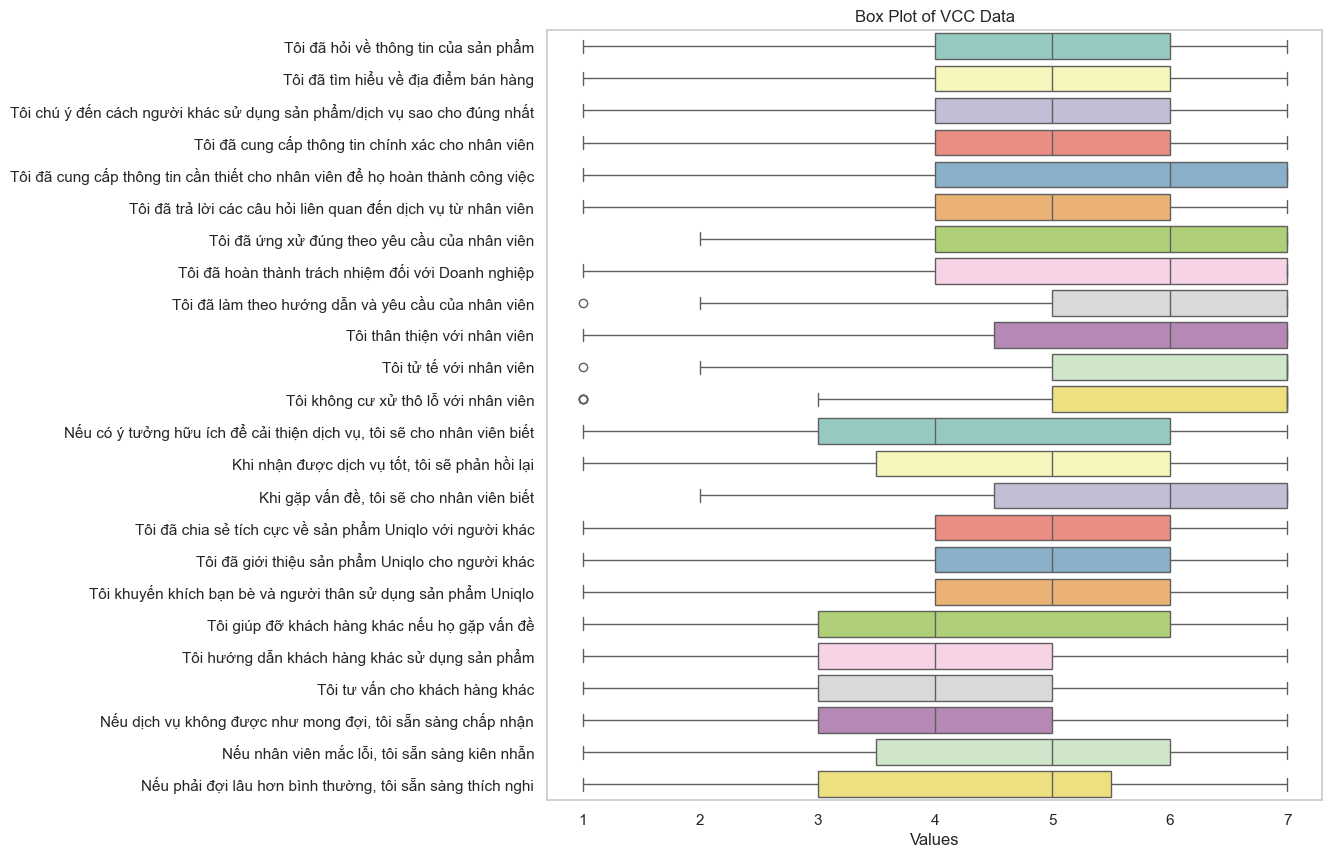

In [531]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 10))
sns.boxplot(data=vcc_data, orient="h", palette="Set3")

plt.grid(False)
plt.title("Box Plot of VCC Data")
plt.xlabel("Values")

plt.show()

In [532]:
import plotly.express as px

fig = px.box(data_frame=vcc_data, orientation="h")

fig.update_layout(
    width=800,
    height = 900,
    title="Box Plot of VCC Data", 
    xaxis_title="Values", 
    yaxis_title=None, 
    font=dict(family="Arial", size=12),
    plot_bgcolor="white",  
    showlegend=False  
)

fig.show()


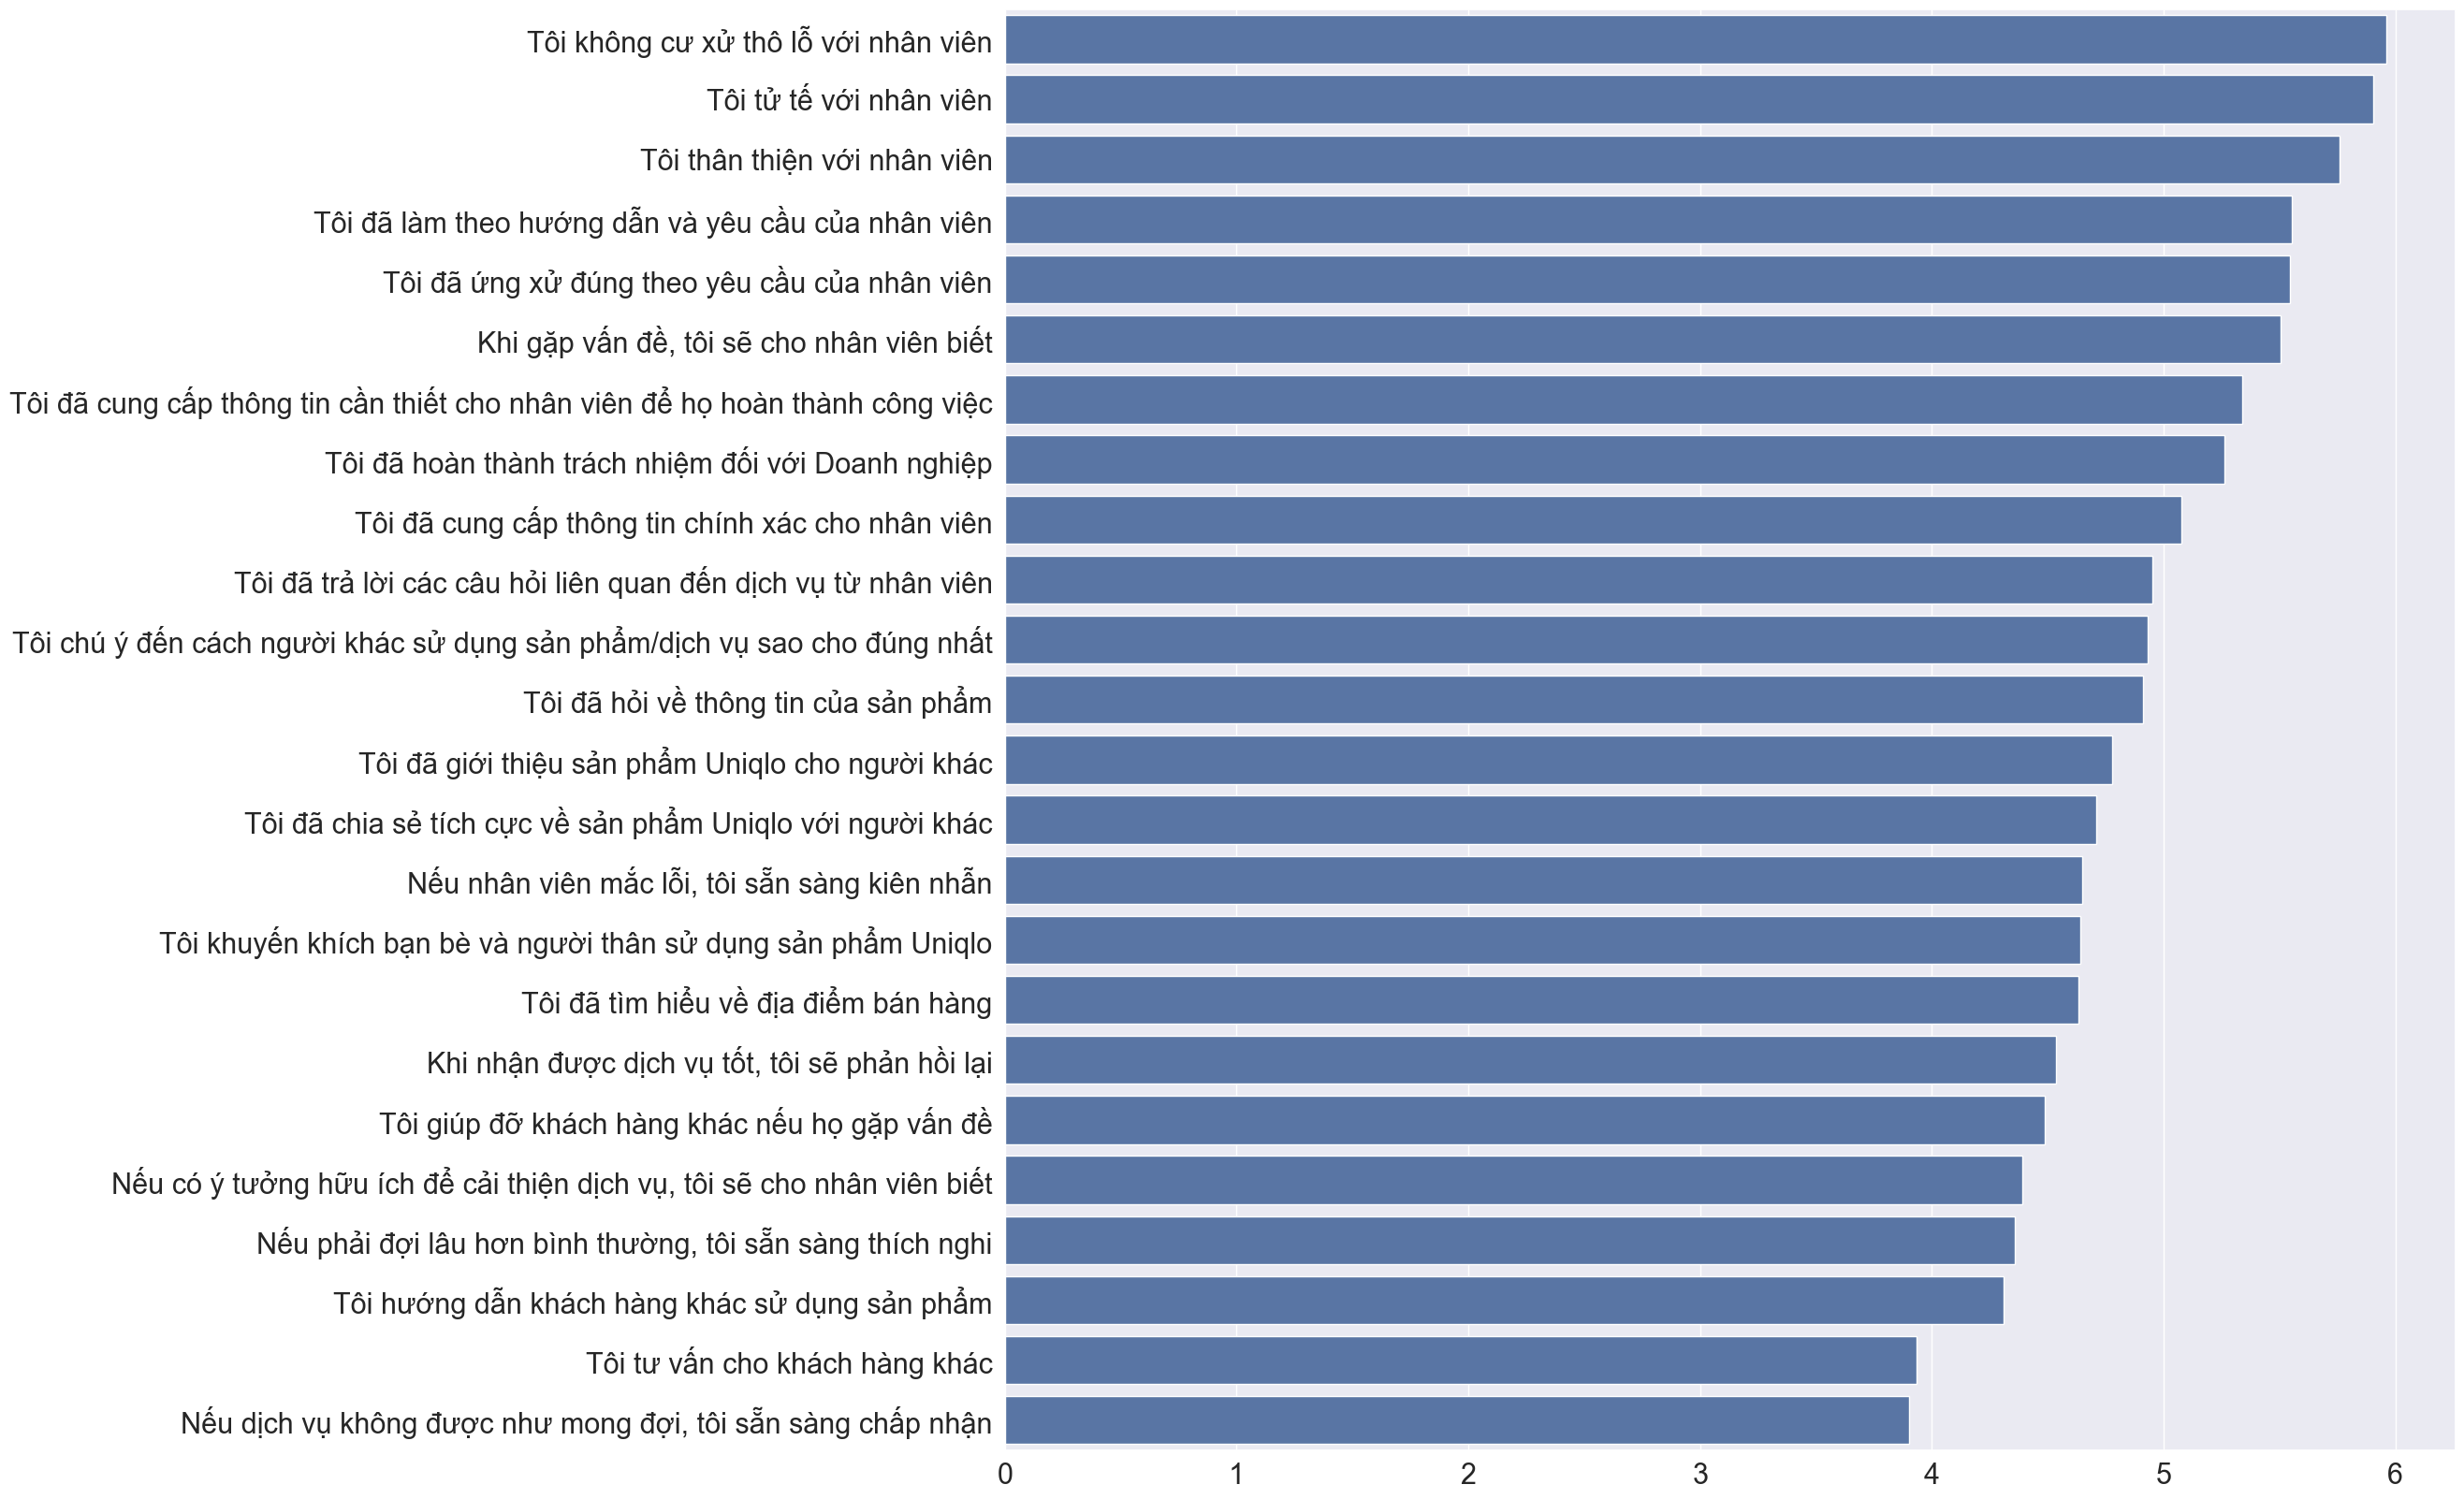

In [533]:
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
sns.barplot(vcc_data.mean().sort_values(ascending=False),orient="h")

plt.show()

Text(0.5, 1.0, 'Correlation Map')

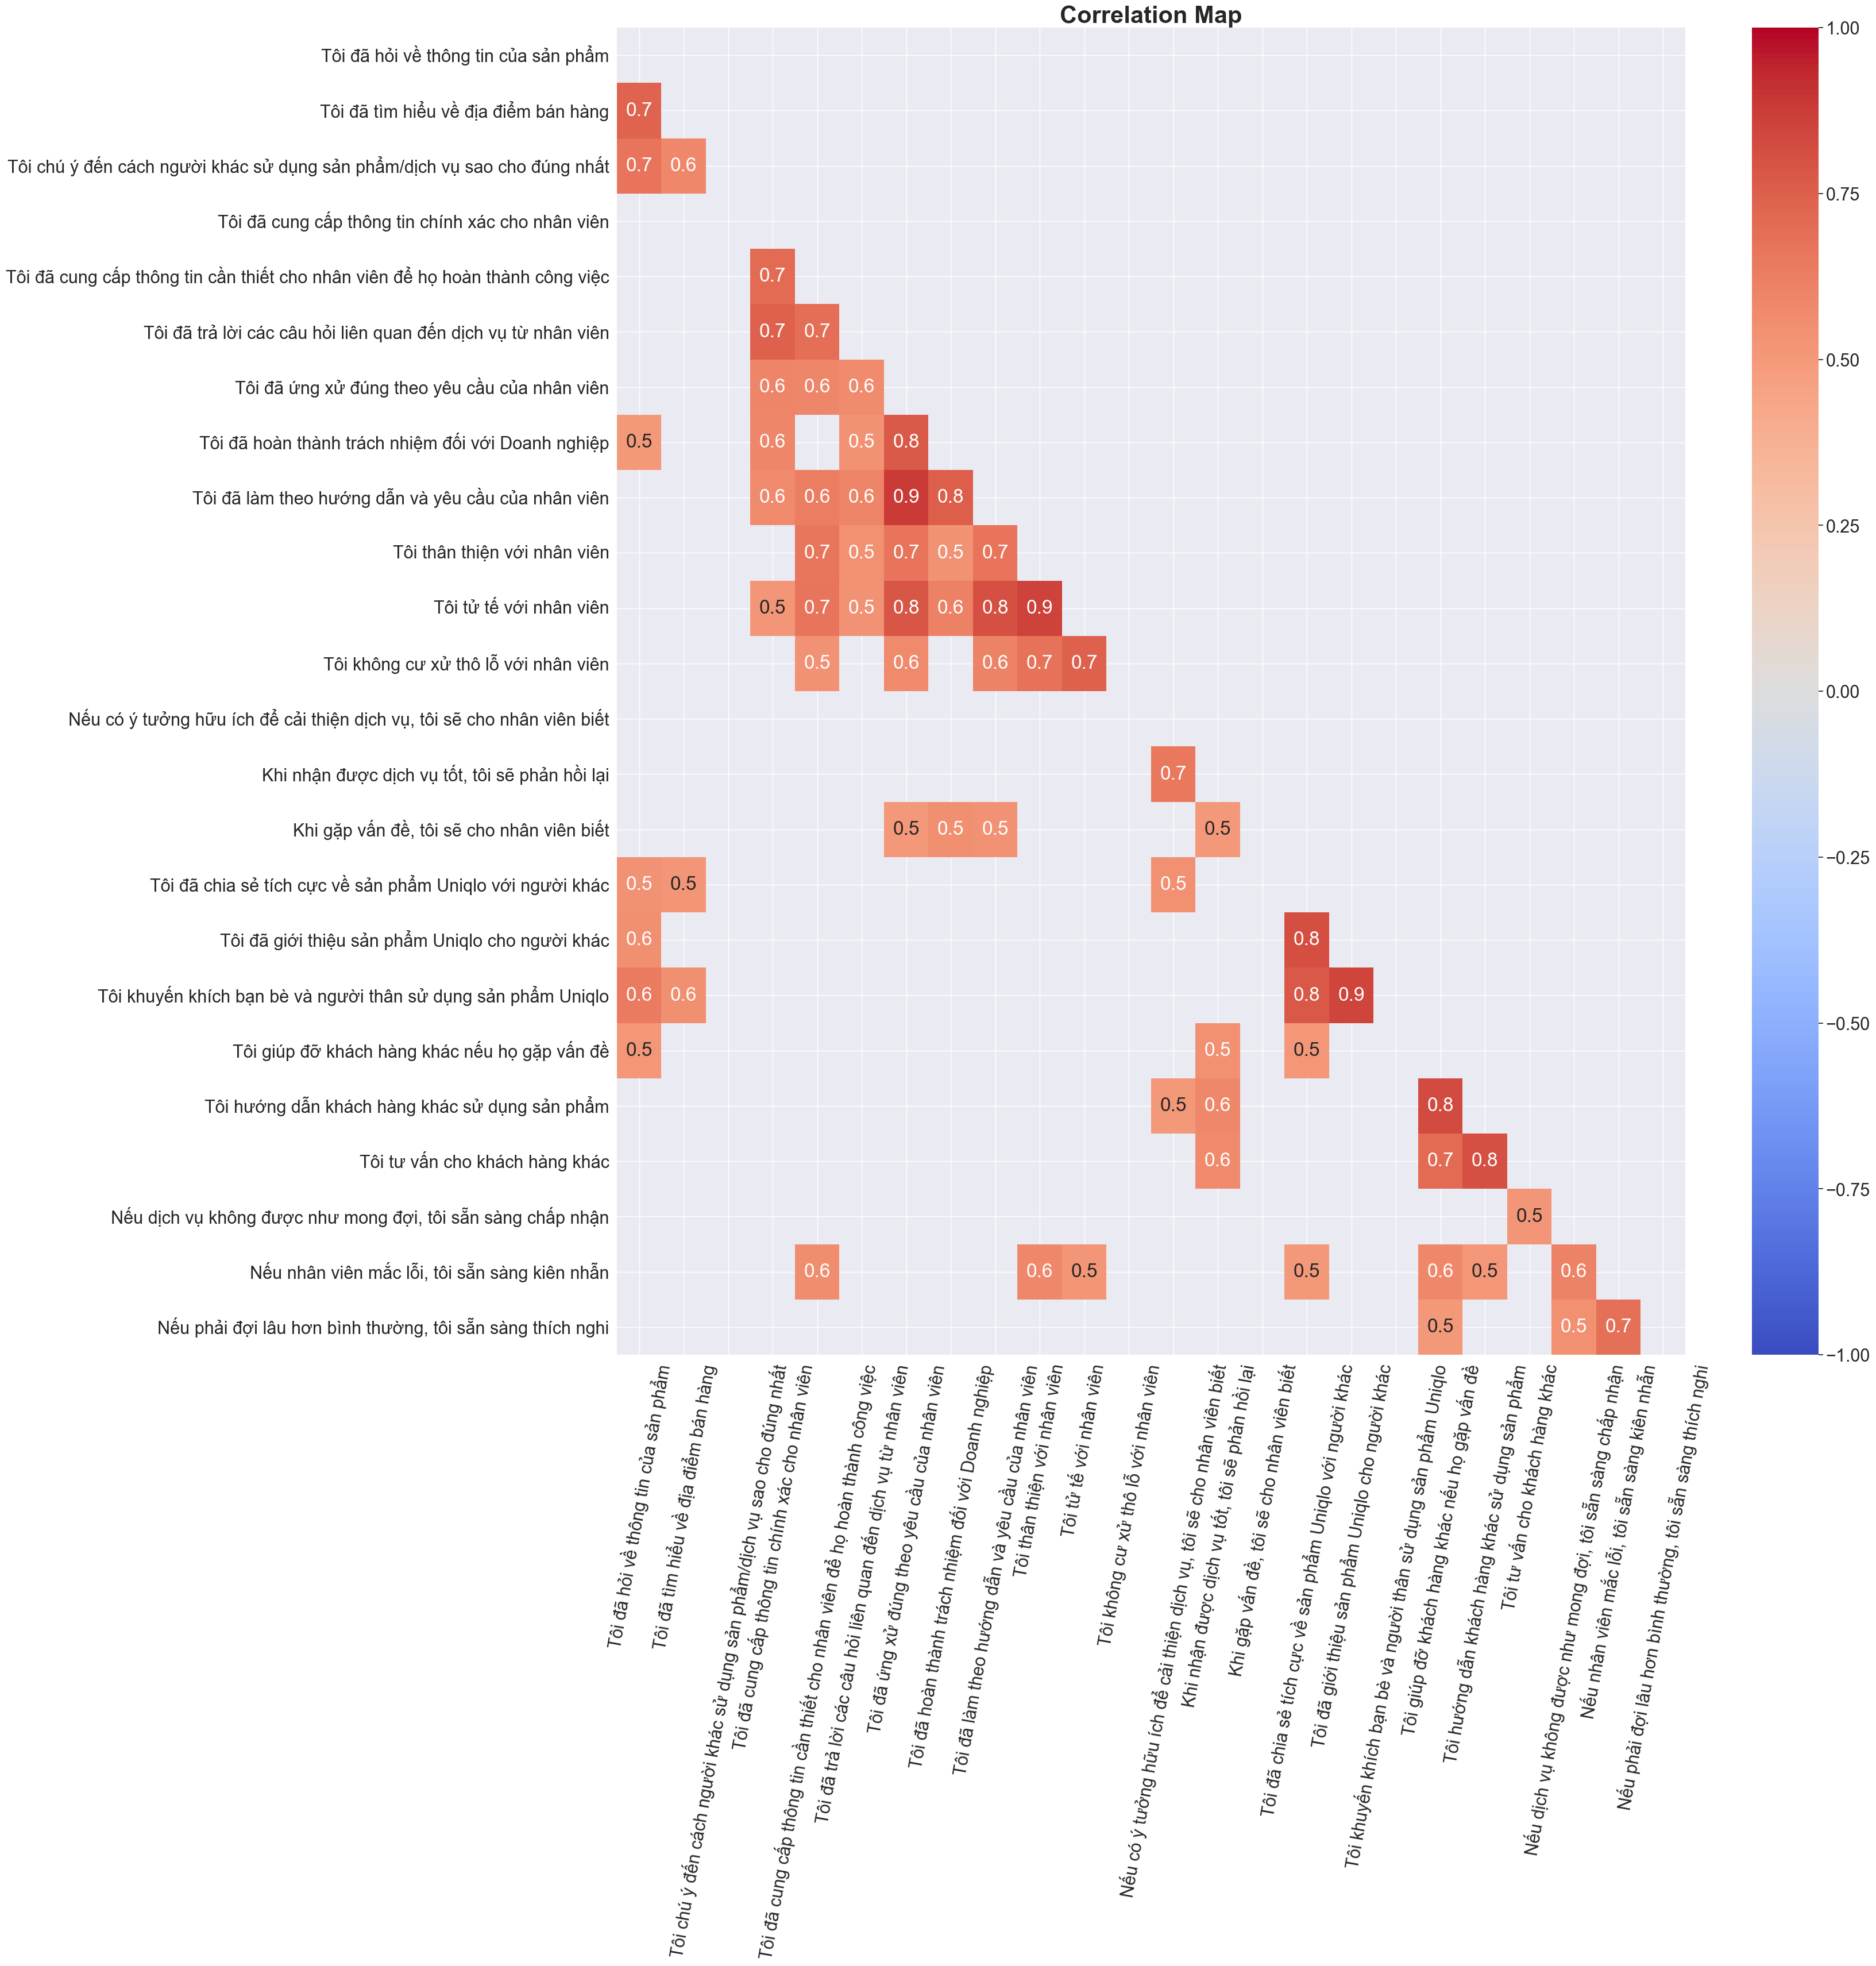

In [534]:
vcc_corr = vcc_data.corr()

threshold = 0.5
high_correlation_df = vcc_corr[(vcc_corr >= threshold) | (vcc_corr <= -threshold)]

sns.set(font_scale=2)
plt.figure(figsize=(30,30))
matrix = np.triu(high_correlation_df)
sns.heatmap(high_correlation_df,annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='coolwarm')

plt.xticks(rotation=80)
plt.title('Correlation Map',fontsize=30, fontweight='bold')

In [535]:
averages = []
for i in range(0,len(vcc_data.columns),3):
    cols = vcc_data.iloc[:,i:i+3]
    avg = cols.mean(axis=1)
    averages.append(avg)

vcc_averages = pd.concat(averages, axis=1)
vcc_averages.columns = ["Tìm kiếm thông tin","Chia sẻ thông tin","thực hiện Hành vi có trách nhiệm","Tương tác cá nhân","Phản hồi","Ủng hộ",
                        "Giúp đỡ","Kiên nhẫn"]

In [536]:
#for col in vcc_averages.columns:
#    vcc_averages[col] = vcc_averages[col].apply(lambda x: f"{x:.2f}")

### 2.2 Analyze Average Values for Each Factor of VCC

In [537]:
vcc_averages.head()

Tìm kiếm thông tin  Chia sẻ thông tin  thực hiện Hành vi có trách nhiệm  \
0            5.333333           7.000000                          7.000000   
1            5.333333           7.000000                          7.000000   
2            3.333333           5.666667                          6.333333   
3            2.666667           1.666667                          4.000000   
4            5.000000           5.000000                          6.000000   

   Tương tác cá nhân  Phản hồi    Ủng hộ   Giúp đỡ  Kiên nhẫn  
0                7.0  4.666667  7.000000  4.666667   4.000000  
1                7.0  4.666667  3.333333  2.000000   1.666667  
2                7.0  3.000000  3.333333  3.333333   6.000000  
3                4.0  2.333333  2.333333  2.000000   3.000000  
4                7.0  6.000000  6.000000  6.000000   6.000000

In [538]:
outlier_check(vcc_averages)

Summary Statistics:
+----------------------------------+-------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-----+
|                                  | count |        mean        |        std         |        min         |        25%         |        50%        |        75%        | max |
+----------------------------------+-------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+-----+
|        Tìm kiếm thông tin        | 103.0 | 4.825242718446601  | 1.4483441527264038 |        1.0         |        4.0         |        5.0        |        6.0        | 7.0 |
|        Chia sẻ thông tin         | 103.0 | 5.122977346278317  | 1.3640180705794915 | 1.6666666666666667 |        4.0         | 5.333333333333333 |        6.0        | 7.0 |
| thực hiện Hành vi có trách nhiệm | 103.0 | 5.453074433656958  | 1.3209014952677283 | 2.3333333333333335

In [539]:
vcc_averages.describe().T

count      mean       std       min  \
Tìm kiếm thông tin                103.0  4.825243  1.448344  1.000000   
Chia sẻ thông tin                 103.0  5.122977  1.364018  1.666667   
thực hiện Hành vi có trách nhiệm  103.0  5.453074  1.320901  2.333333   
Tương tác cá nhân                 103.0  5.873786  1.331794  1.000000   
Phản hồi                          103.0  4.809061  1.333008  2.000000   
Ủng hộ                            103.0  4.708738  1.484619  1.000000   
Giúp đỡ                           103.0  4.242718  1.523379  1.000000   
Kiên nhẫn                         103.0  4.304207  1.314497  1.000000   

                                       25%       50%       75%  max  
Tìm kiếm thông tin                4.000000  5.000000  6.000000  7.0  
Chia sẻ thông tin                 4.000000  5.333333  6.000000  7.0  
thực hiện Hành vi có trách nhiệm  4.333333  5.666667  6.666667  7.0  
Tương tác cá nhân                 5.000000  6.333333  7.000000  7.0  
Phản hồi                          4.000000  4.666667  6.000000  7.0  
Ủng hộ                            4.000000  4.666667  6.000000  7.0  
Giúp đỡ                           3.000000  4.333333  5.333333  7.0  
Kiên nhẫn                         3.333333  4.333333  5.333333  7.0

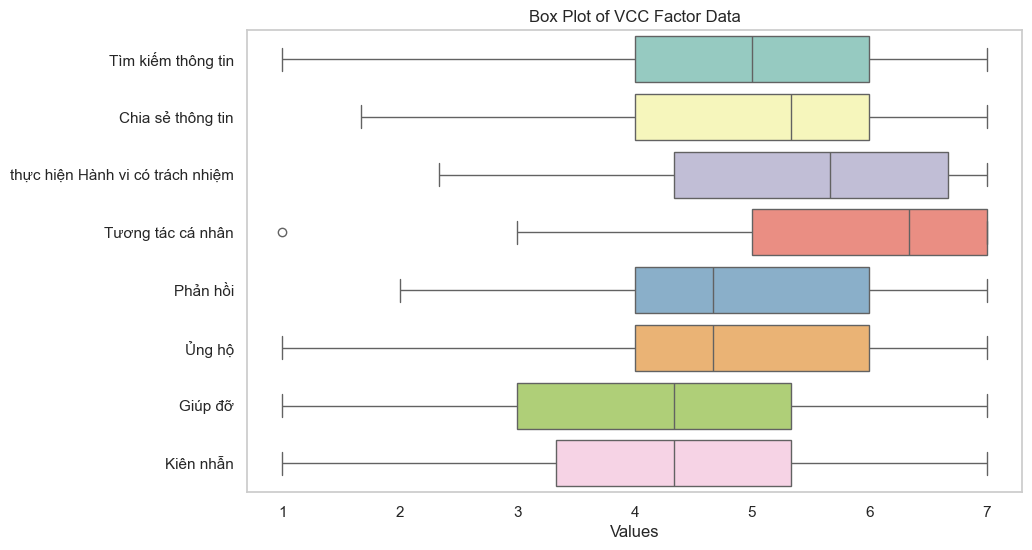

In [540]:
sns.set(style="whitegrid",font_scale=1)

plt.figure(figsize=(10, 6))
sns.boxplot(data=vcc_averages, orient="h", palette="Set3")

plt.grid(False)
plt.title("Box Plot of VCC Factor Data")
plt.xlabel("Values")

plt.show()

Text(0.5, 1.0, 'VCC Factor Correlation Map')

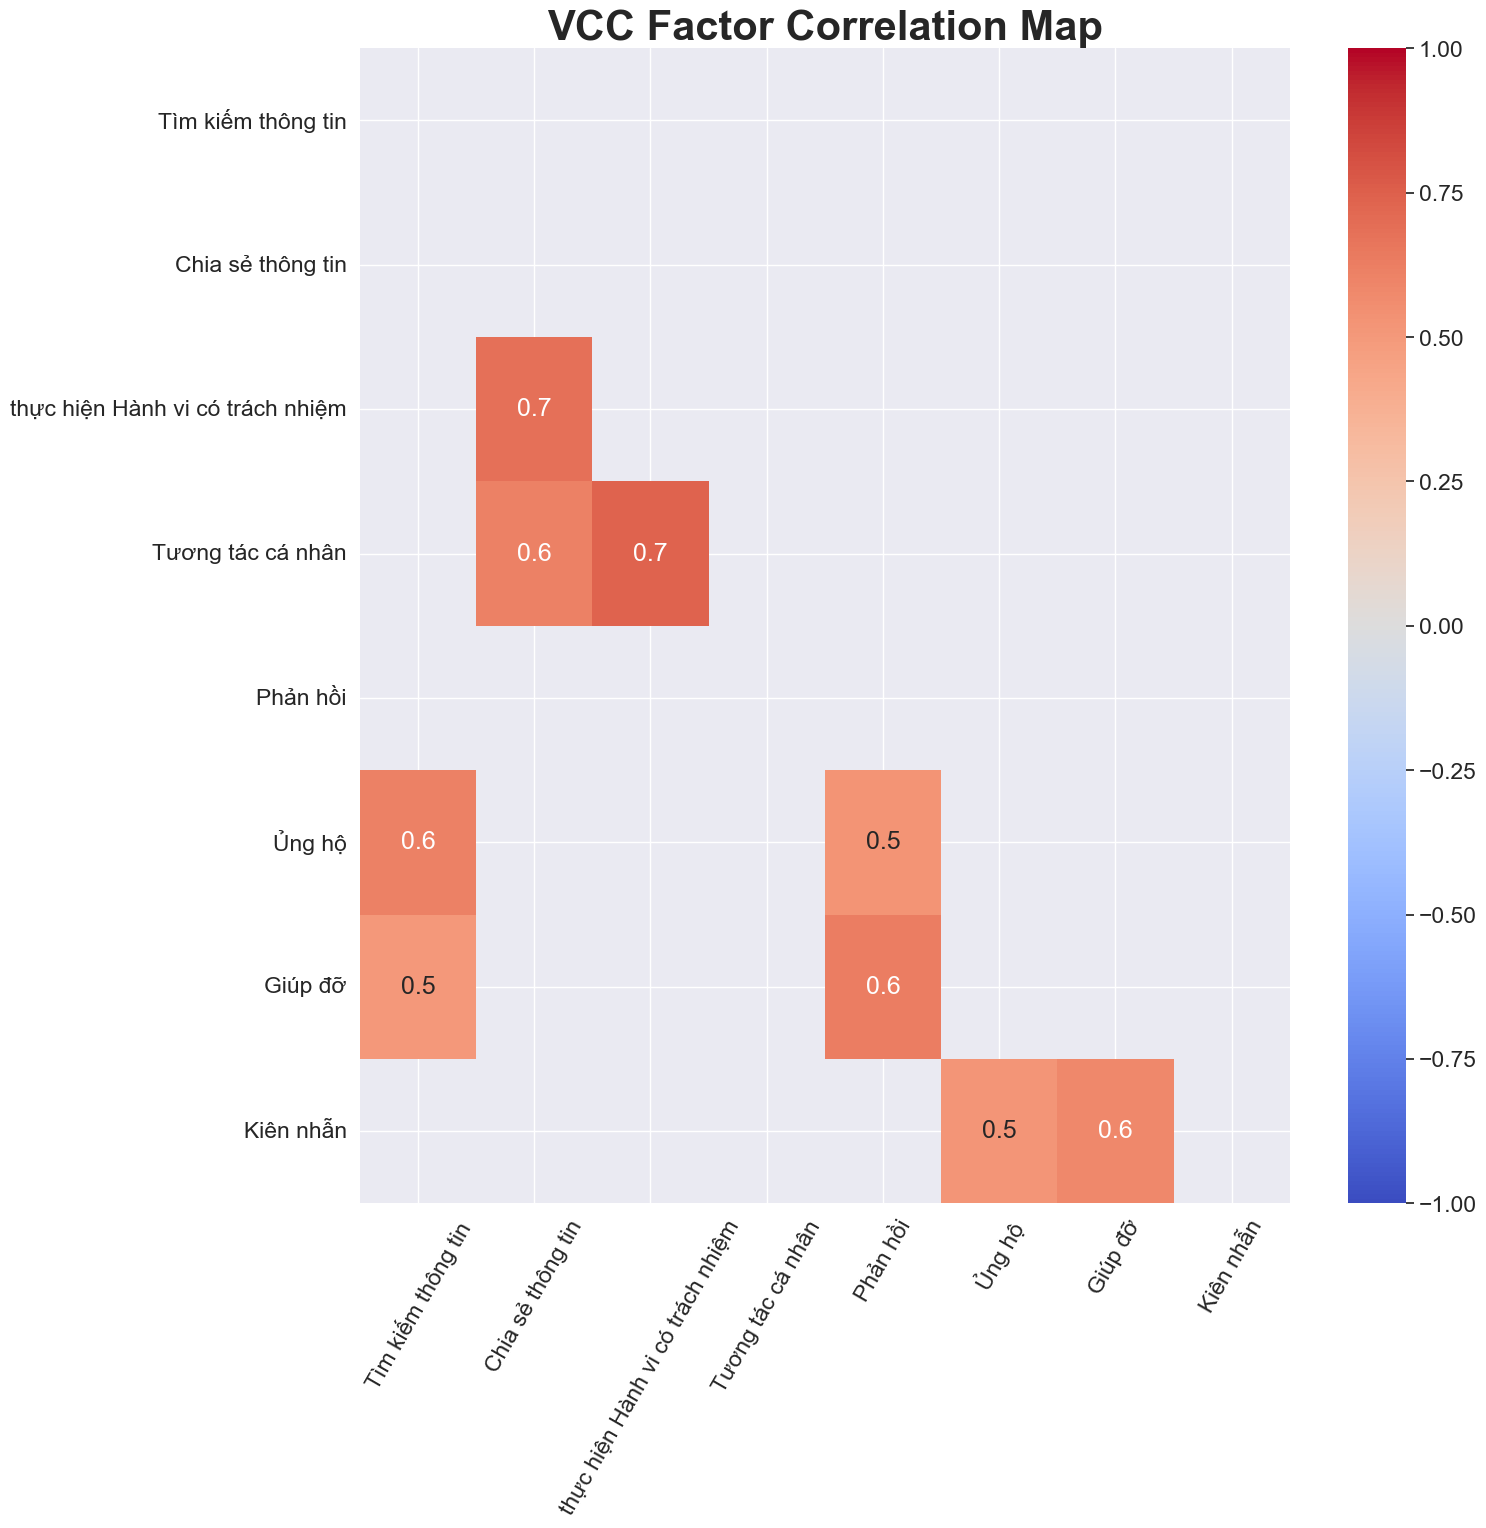

In [541]:
vcc_avg_corr = vcc_averages.corr()

threshold = 0.5
high_correlation_df =vcc_avg_corr[(vcc_avg_corr >= threshold) | (vcc_avg_corr <= -threshold)]

sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
matrix = np.triu(high_correlation_df)
sns.heatmap(high_correlation_df,annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='coolwarm')

plt.xticks(rotation=60)
plt.title('VCC Factor Correlation Map',fontsize=30, fontweight='bold')

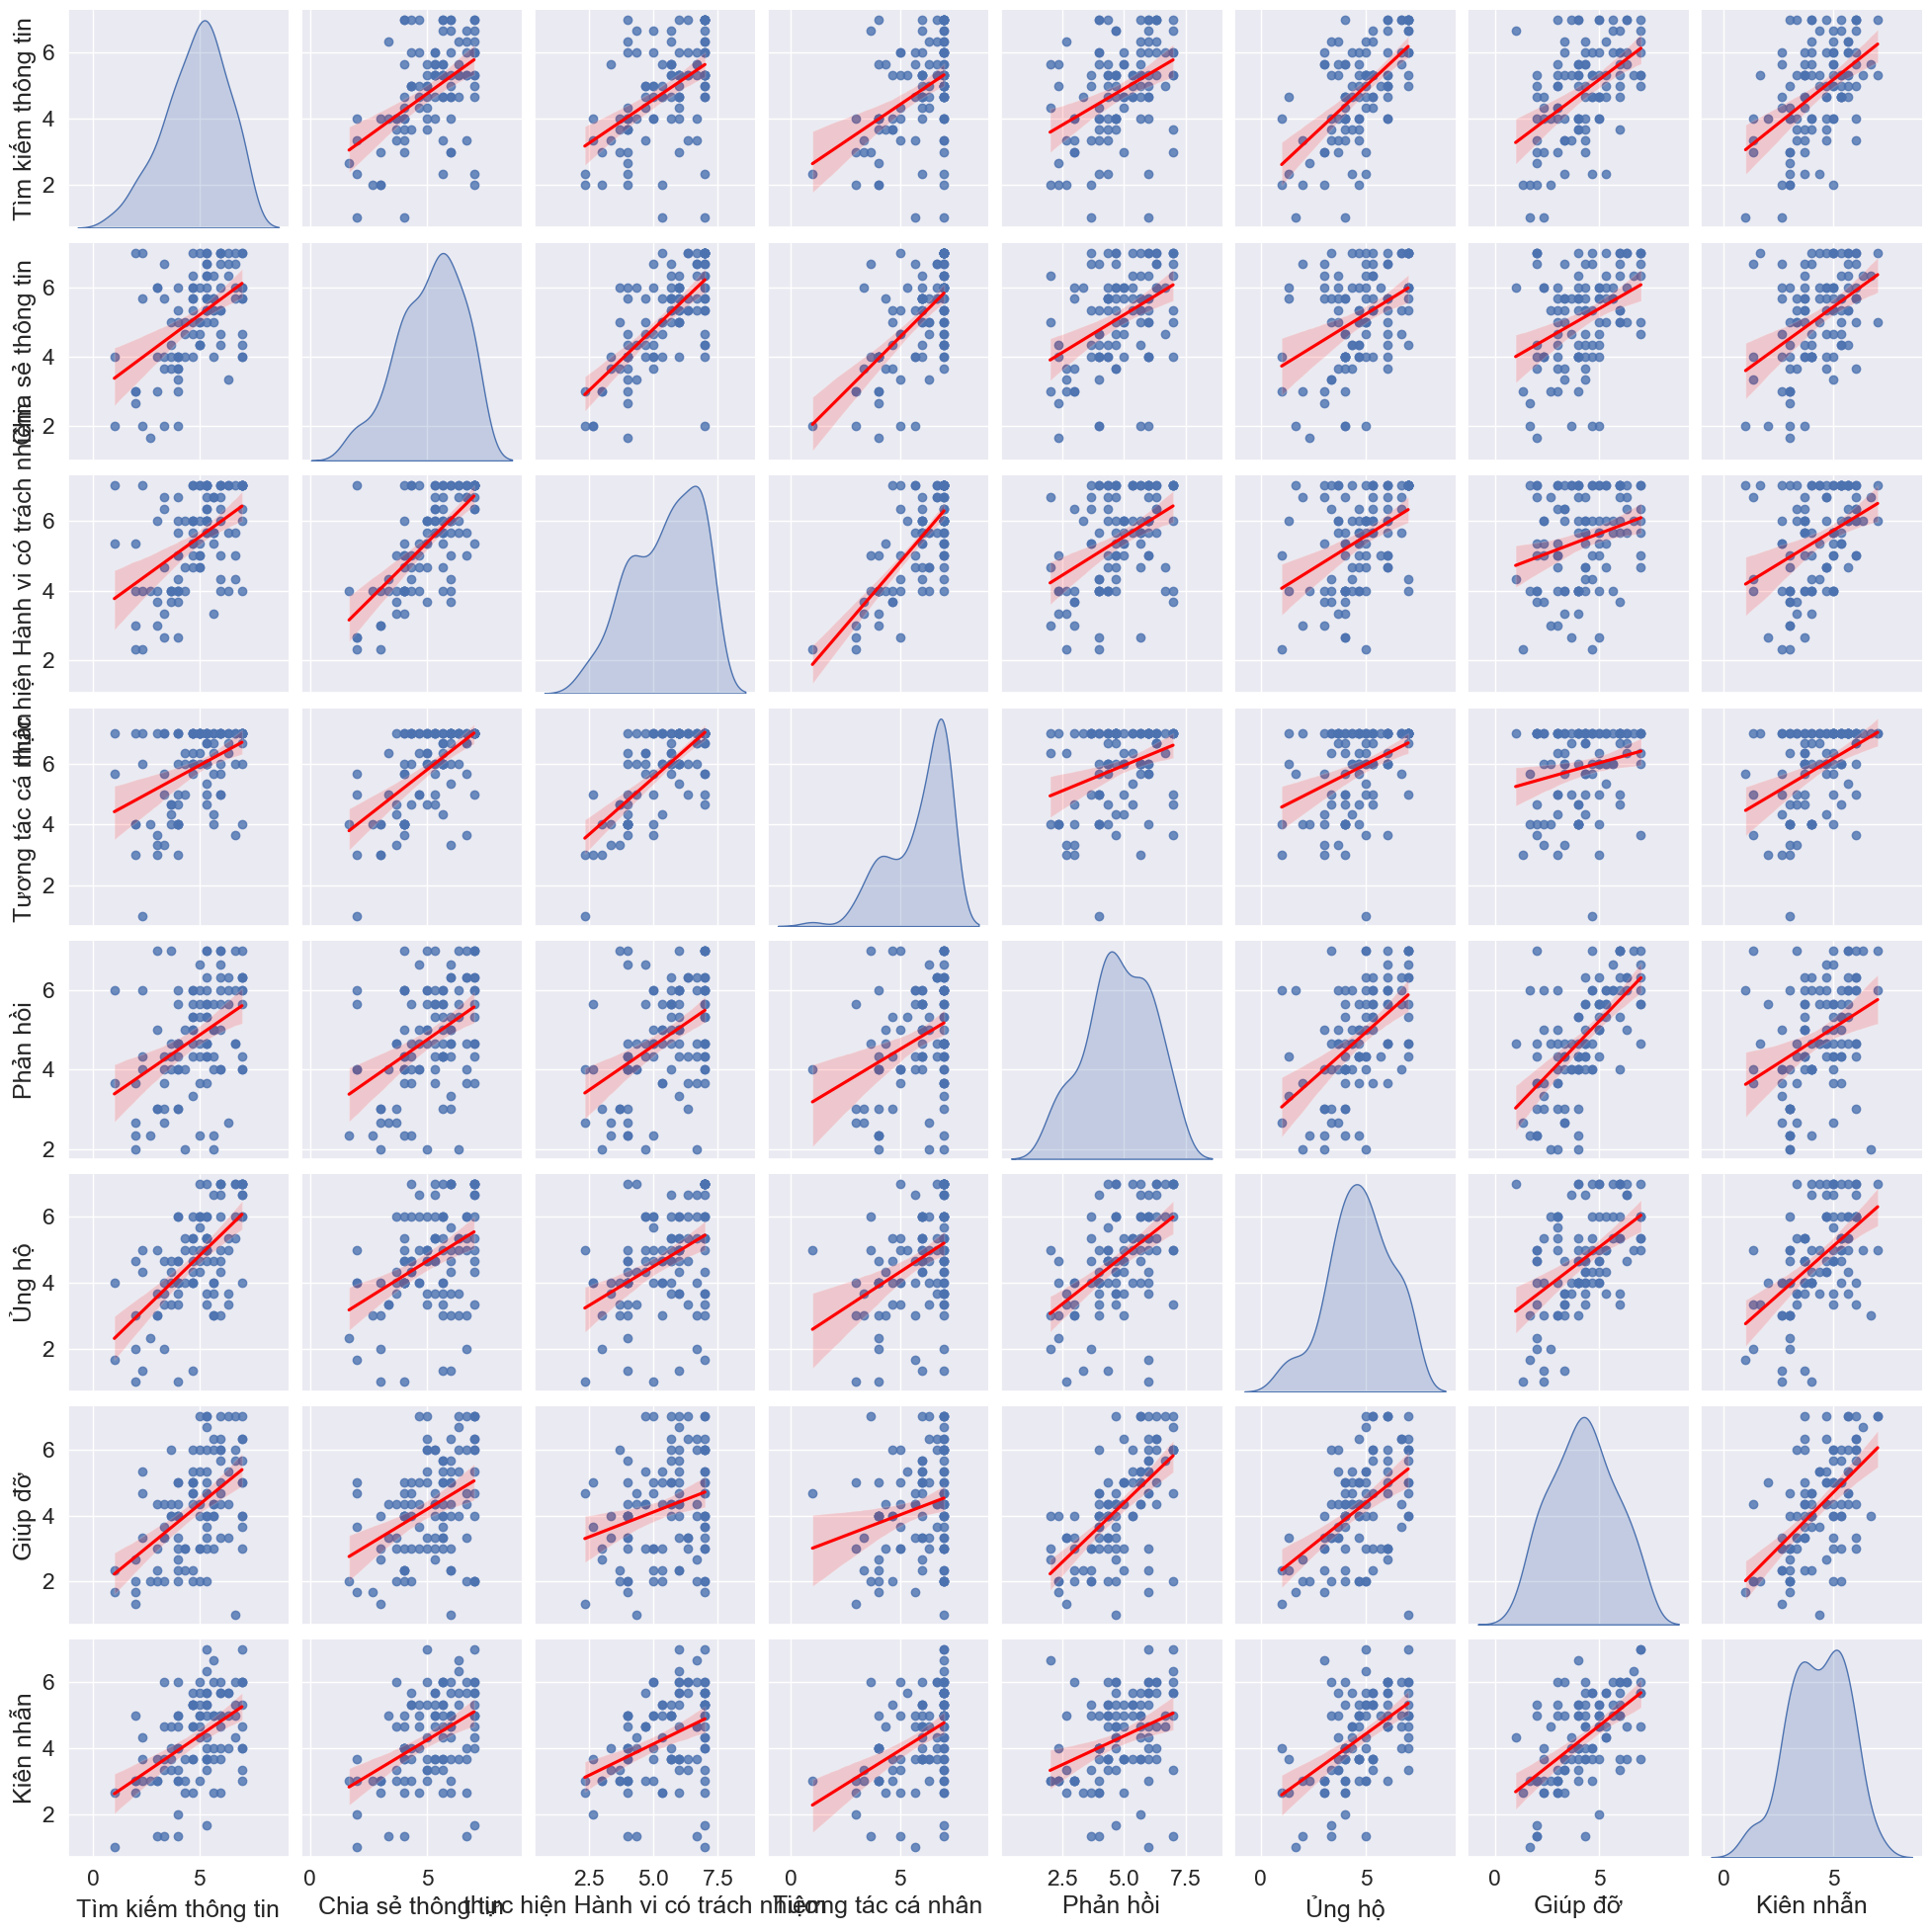

In [542]:
sns.pairplot(vcc_averages,diag_kind="kde",kind="reg",plot_kws={'line_kws':{'color':'red'}})

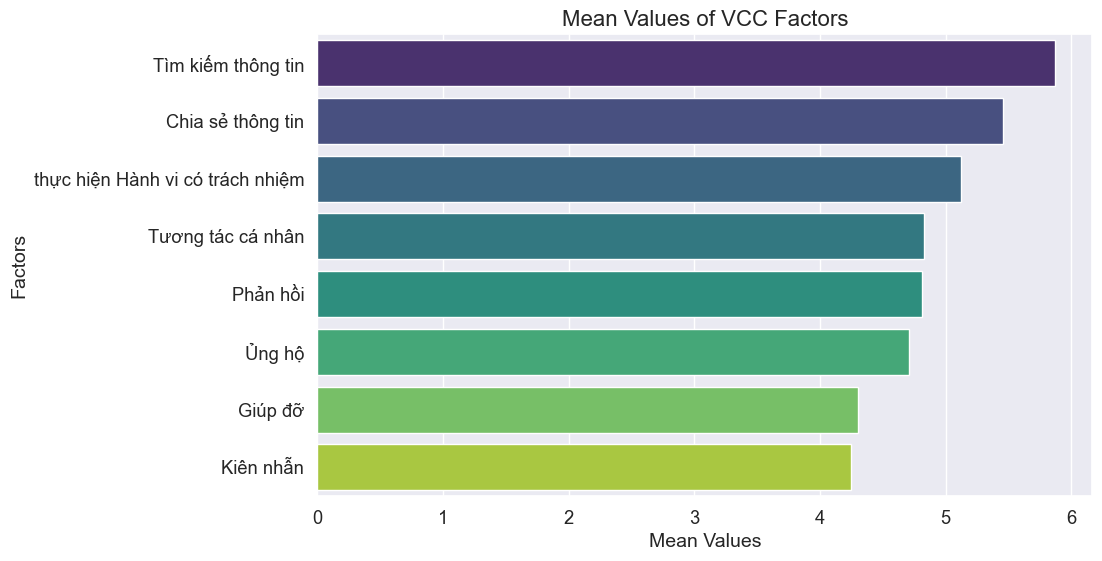

In [543]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)

sns.barplot(x=vcc_averages.mean().sort_values(ascending=False),orient="h",y=vcc_averages.columns,hue=vcc_averages.columns,palette="viridis")

plt.xlabel('Mean Values', fontsize=14)
plt.ylabel('Factors', fontsize=14)
plt.title('Mean Values of VCC Factors', fontsize=16)
plt.show()

In [544]:
vcc_averages_res = vcc_averages.merge(res_data,how="inner",left_index=True,right_index=True)
vcc_averages_res.head()

Tìm kiếm thông tin  Chia sẻ thông tin  thực hiện Hành vi có trách nhiệm  \
0            5.333333           7.000000                          7.000000   
1            5.333333           7.000000                          7.000000   
2            3.333333           5.666667                          6.333333   
3            2.666667           1.666667                          4.000000   
4            5.000000           5.000000                          6.000000   

   Tương tác cá nhân  Phản hồi    Ủng hộ   Giúp đỡ  Kiên nhẫn Tuổi của bạn  \
0                7.0  4.666667  7.000000  4.666667   4.000000      18 - 25   
1                7.0  4.666667  3.333333  2.000000   1.666667      18 - 25   
2                7.0  3.000000  3.333333  3.333333   6.000000      18 - 25   
3                4.0  2.333333  2.333333  2.000000   3.000000      18 - 25   
4                7.0  6.000000  6.000000  6.000000   6.000000      18 - 25   

  Giới tính Thu nhập hàng tháng của bạn  
0        Nữ               Dưới 10 triệu  
1        Nữ               Dưới 10 triệu  
2       Nam            Chưa có thu nhập  
3        Nữ            Chưa có thu nhập  
4        Nữ            Chưa có thu nhập

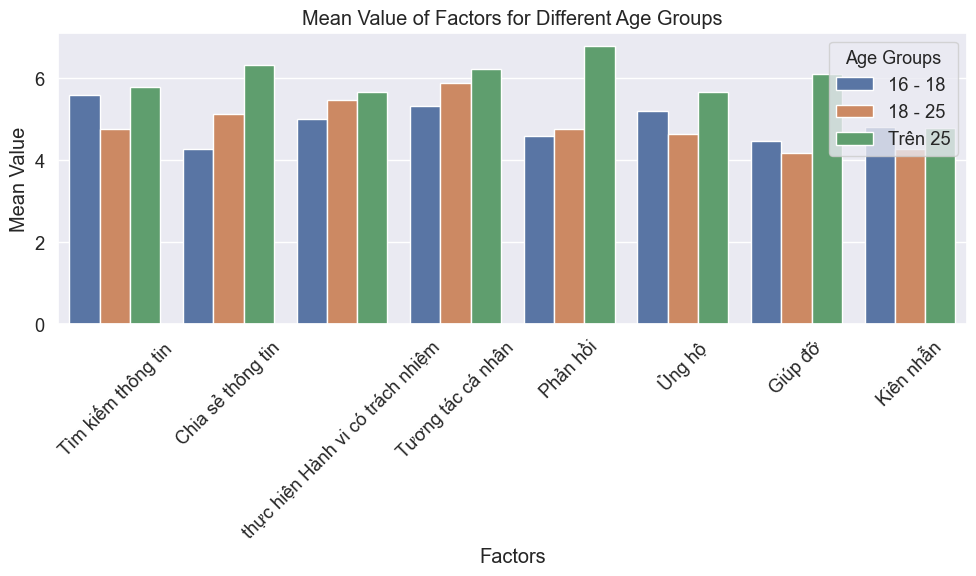

In [545]:
var_age=vcc_averages_res.iloc[:,:-2].groupby("Tuổi của bạn").mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=var_age.melt(id_vars='Tuổi của bạn', var_name='Factors', value_name='Mean Value'),
            x='Factors', y='Mean Value', hue='Tuổi của bạn')

plt.xlabel('Factors')
plt.ylabel('Mean Value')
plt.title('Mean Value of Factors for Different Age Groups')

plt.xticks(rotation=45)

plt.legend(title='Age Groups', title_fontsize='13')

plt.tight_layout()
plt.show()

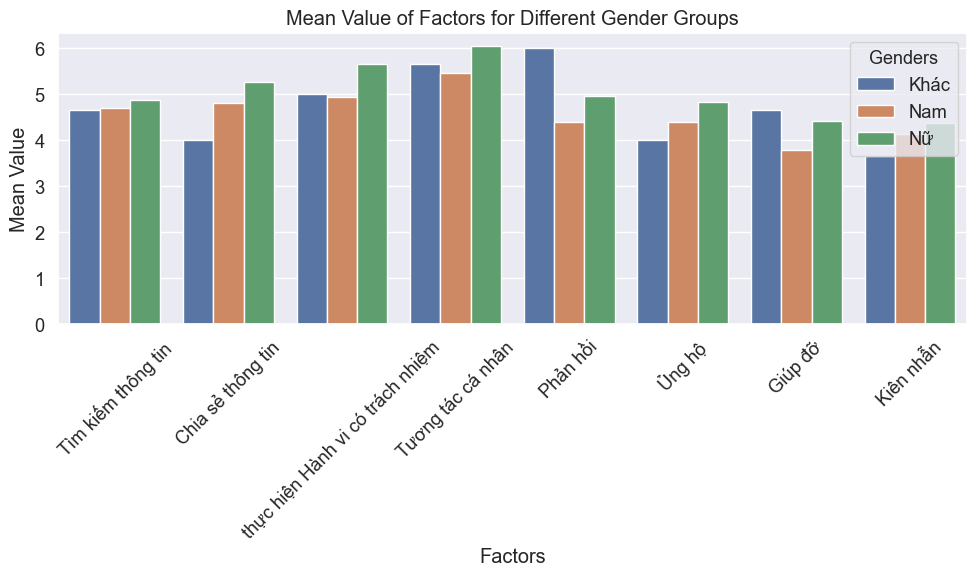

In [546]:
var_sex=vcc_averages_res.iloc[:,:-1].drop("Tuổi của bạn",axis=1).groupby("Giới tính").mean().reset_index()


stacked_df = var_sex.set_index('Giới tính').stack().reset_index().rename(columns={'level_1': 'Factors', 0: 'Mean Value'})

plt.figure(figsize=(10, 6))
sns.barplot(data=stacked_df, x='Factors', y='Mean Value', hue='Giới tính')

plt.xlabel('Factors')
plt.ylabel('Mean Value')
plt.title('Mean Value of Factors for Different Gender Groups')

plt.xticks(rotation=45)

plt.legend(title='Genders', title_fontsize='13')

plt.tight_layout()
plt.show()


## 3. Khảo sát về mức độ nhận thức về CSR của các doanh nghiệp thời trang 

In [547]:
csr_data.head()

Thiết lập quy trình giải quyết khiếu nại của khách hàng  \
0                                                  7         
1                                                  7         
2                                                  5         
3                                                  2         
4                                                  5         

   Đối xử trung thực với khách hàng  \
0                                 7   
1                                 5   
2                                 5   
3                                 4   
4                                 5   

   Có đội ngũ nhân viên cung cấp thông tin đầy đủ về sản phẩm / dịch vụ của công ty cho khách hàng  \
0                                                  7                                                 
1                                                  7                                                 
2                                                  7                                                 
3                                                  4                                                 
4                                                  5                                                 

   Dựa vào mức độ hài lòng của khách hàng để cải thiện sản phẩm/dịch vụ  \
0                                                  5                      
1                                                  5                      
2                                                  6                      
3                                                  4                      
4                                                  5                      

   Nỗ lực tìm hiểu nhu cầu của khách hàng  \
0                                       3   
1                                       2   
2                                       7   
3                                       4   
4                                       5   

   Đảm bảo an toàn lao động cho nhân viên  Đối xử công bằng với nhân viên  \
0                                       4                               5   
1                                       6                               5   
2                                       6                               5   
3                                       3                               3   
4                                       5                               5   

   Cung cấp môi trường làm việc thoải mái (ví dụ: giờ làm việc linh hoạt, hòa giải)  \
0                                                  5                                  
1                                                  7                                  
2                                                  5                                  
3                                                  3                                  
4                                                  5                                  

   Góp phần giải quyết các vấn đề xã hội  \
0                                      3   
1                                      4   
2                                      5   
3                                      2   
4                                      5   

   Từ thiện để cải thiện tình trạng nhóm yếu thế trong xã hội  \
0                                                  4            
1                                                  4            
2                                                  6            
3                                                  2            
4                                                  5            

   Góp tiền cho các sự kiện văn hóa và xã hội (ví dụ: âm nhạc, thể thao)  \
0                                                  2                       
1                                                  3                       
2                                                  5                       
3                                                  3                       
4                                     

In [548]:
check(csr_data)

dtype valid_instances  \
Thiết lập quy trình giải quyết khiếu nại của kh...    int64             103   
Đối xử trung thực với khách hàng                      int64             103   
Có đội ngũ nhân viên cung cấp thông tin đầy đủ ...    int64             103   
Dựa vào mức độ hài lòng của khách hàng để cải t...    int64             103   
Nỗ lực tìm hiểu nhu cầu của khách hàng                int64             103   
Đảm bảo an toàn lao động cho nhân viên                int64             103   
Đối xử công bằng với nhân viên                        int64             103   
Cung cấp môi trường làm việc thoải mái (ví dụ: ...    int64             103   
Góp phần giải quyết các vấn đề xã hội                 int64             103   
Từ thiện để cải thiện tình trạng nhóm yếu thế t...    int64             103   
Góp tiền cho các sự kiện văn hóa và xã hội (ví ...    int64             103   
Quan tâm đến việc tôn trọng và bảo vệ môi trườn...  float64             100   

                                                   unique sum_null duplicates  
Thiết lập quy trình giải quyết khiếu nại của kh...      6        0         97  
Đối xử trung thực với khách hàng                        6        0         97  
Có đội ngũ nhân viên cung cấp thông tin đầy đủ ...      6        0         97  
Dựa vào mức độ hài lòng của khách hàng để cải t...      7        0         96  
Nỗ lực tìm hiểu nhu cầu của khách hàng                  6        0         97  
Đảm bảo an toàn lao động cho nhân viên                  7        0         96  
Đối xử công bằng với nhân viên                          6        0         97  
Cung cấp môi trường làm việc thoải mái (ví dụ: ...      6        0         97  
Góp phần giải quyết các vấn đề xã hội                   6        0         97  
Từ thiện để cải thiện tình trạng nhóm yếu thế t...      7        0         96  
Góp tiền cho các sự kiện văn hóa và xã hội (ví ...      6        0         97  
Quan tâm đến việc tôn trọng và bảo vệ môi trườn...      7        3         95

In [549]:
csr_data.dropna().mean()

Thiết lập quy trình giải quyết khiếu nại của khách hàng                                            5.24
Đối xử trung thực với khách hàng                                                                   5.34
Có đội ngũ nhân viên cung cấp thông tin đầy đủ về sản phẩm / dịch vụ của công ty cho khách hàng    5.67
Dựa vào mức độ hài lòng của khách hàng để cải thiện sản phẩm/dịch vụ                               5.45
Nỗ lực tìm hiểu nhu cầu của khách hàng                                                             5.53
Đảm bảo an toàn lao động cho nhân viên                                                             5.19
Đối xử công bằng với nhân viên                                                                     5.18
Cung cấp môi trường làm việc thoải mái (ví dụ: giờ làm việc linh hoạt, hòa giải)                   5.18
Góp phần giải quyết các vấn đề xã hội                                                              4.89
Từ thiện để cải thiện tình trạng nhóm yếu thế trong xã hội      

In [550]:
outlier_check(csr_data)

Summary Statistics:
+-------------------------------------------------------------------------------------------------+-------+-------------------+--------------------+-----+-----+-----+-----+-----+
|                                                                                                 | count |       mean        |        std         | min | 25% | 50% | 75% | max |
+-------------------------------------------------------------------------------------------------+-------+-------------------+--------------------+-----+-----+-----+-----+-----+
|                     Thiết lập quy trình giải quyết khiếu nại của khách hàng                     | 103.0 | 5.271844660194175 | 1.3804956111830697 | 2.0 | 4.0 | 5.0 | 6.0 | 7.0 |
|                                Đối xử trung thực với khách hàng                                 | 103.0 | 5.349514563106796 | 1.348264955226427  | 2.0 | 4.0 | 5.0 | 6.5 | 7.0 |
| Có đội ngũ nhân viên cung cấp thông tin đầy đủ về sản phẩm / dịch vụ của công ty ch

So there is surprisingly no outlier in CSR dataset

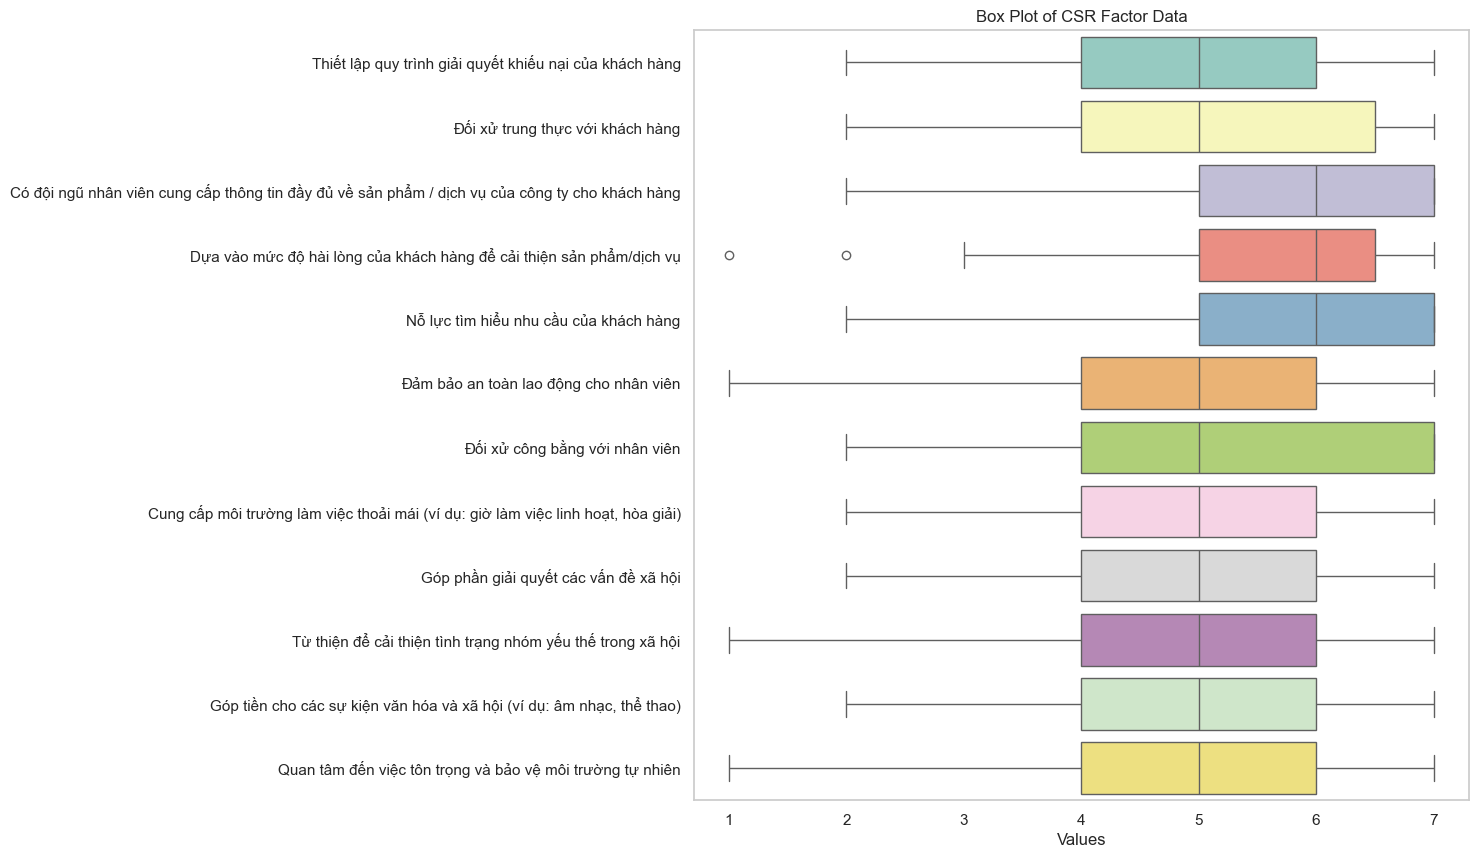

In [551]:
sns.set(style="whitegrid",font_scale=1)

plt.figure(figsize=(10, 10))
sns.boxplot(data=csr_data, orient="h", palette="Set3")

plt.grid(False)
plt.title("Box Plot of CSR Factor Data")
plt.xlabel("Values")

plt.show()

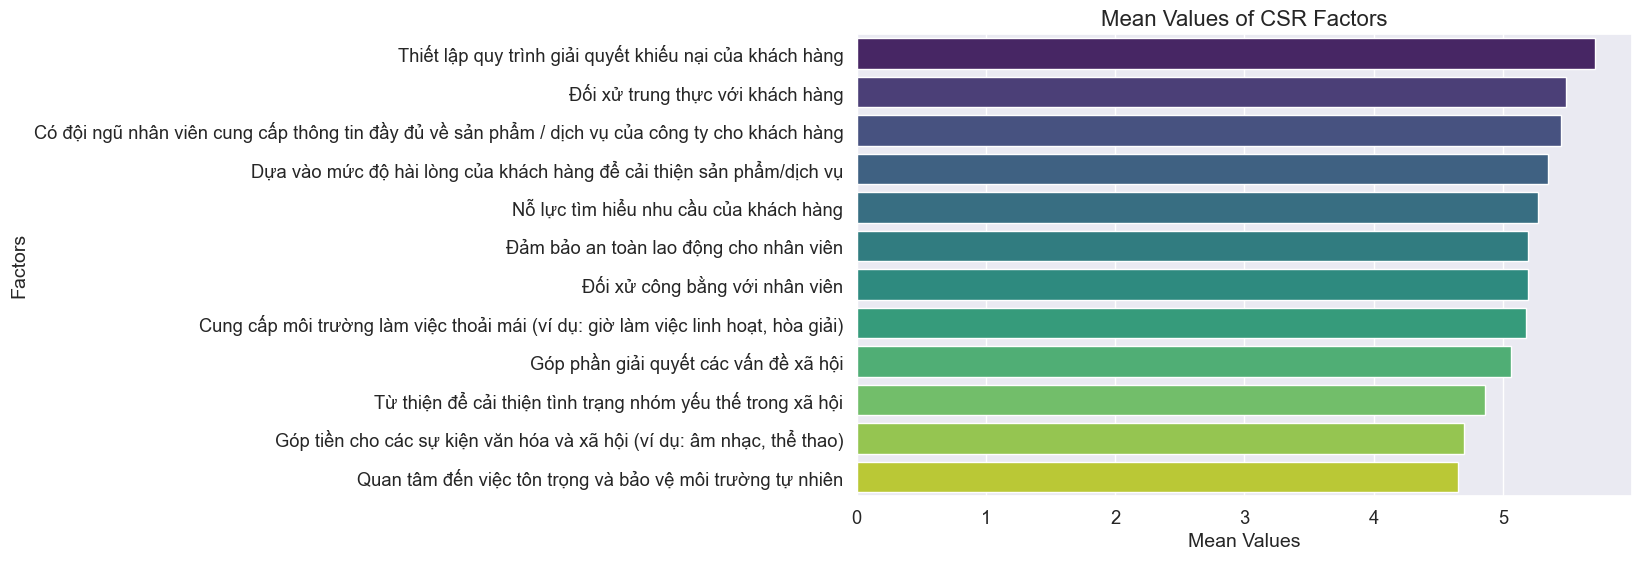

In [552]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)

sns.barplot(x=csr_data.mean().sort_values(ascending=False),orient="h",y=csr_data.columns,hue=csr_data.columns,palette="viridis")

plt.xlabel('Mean Values', fontsize=14)
plt.ylabel('Factors', fontsize=14)
plt.title('Mean Values of CSR Factors', fontsize=16)
plt.show()

Text(0.5, 1.0, 'CSR Sub-factors Correlation Map')

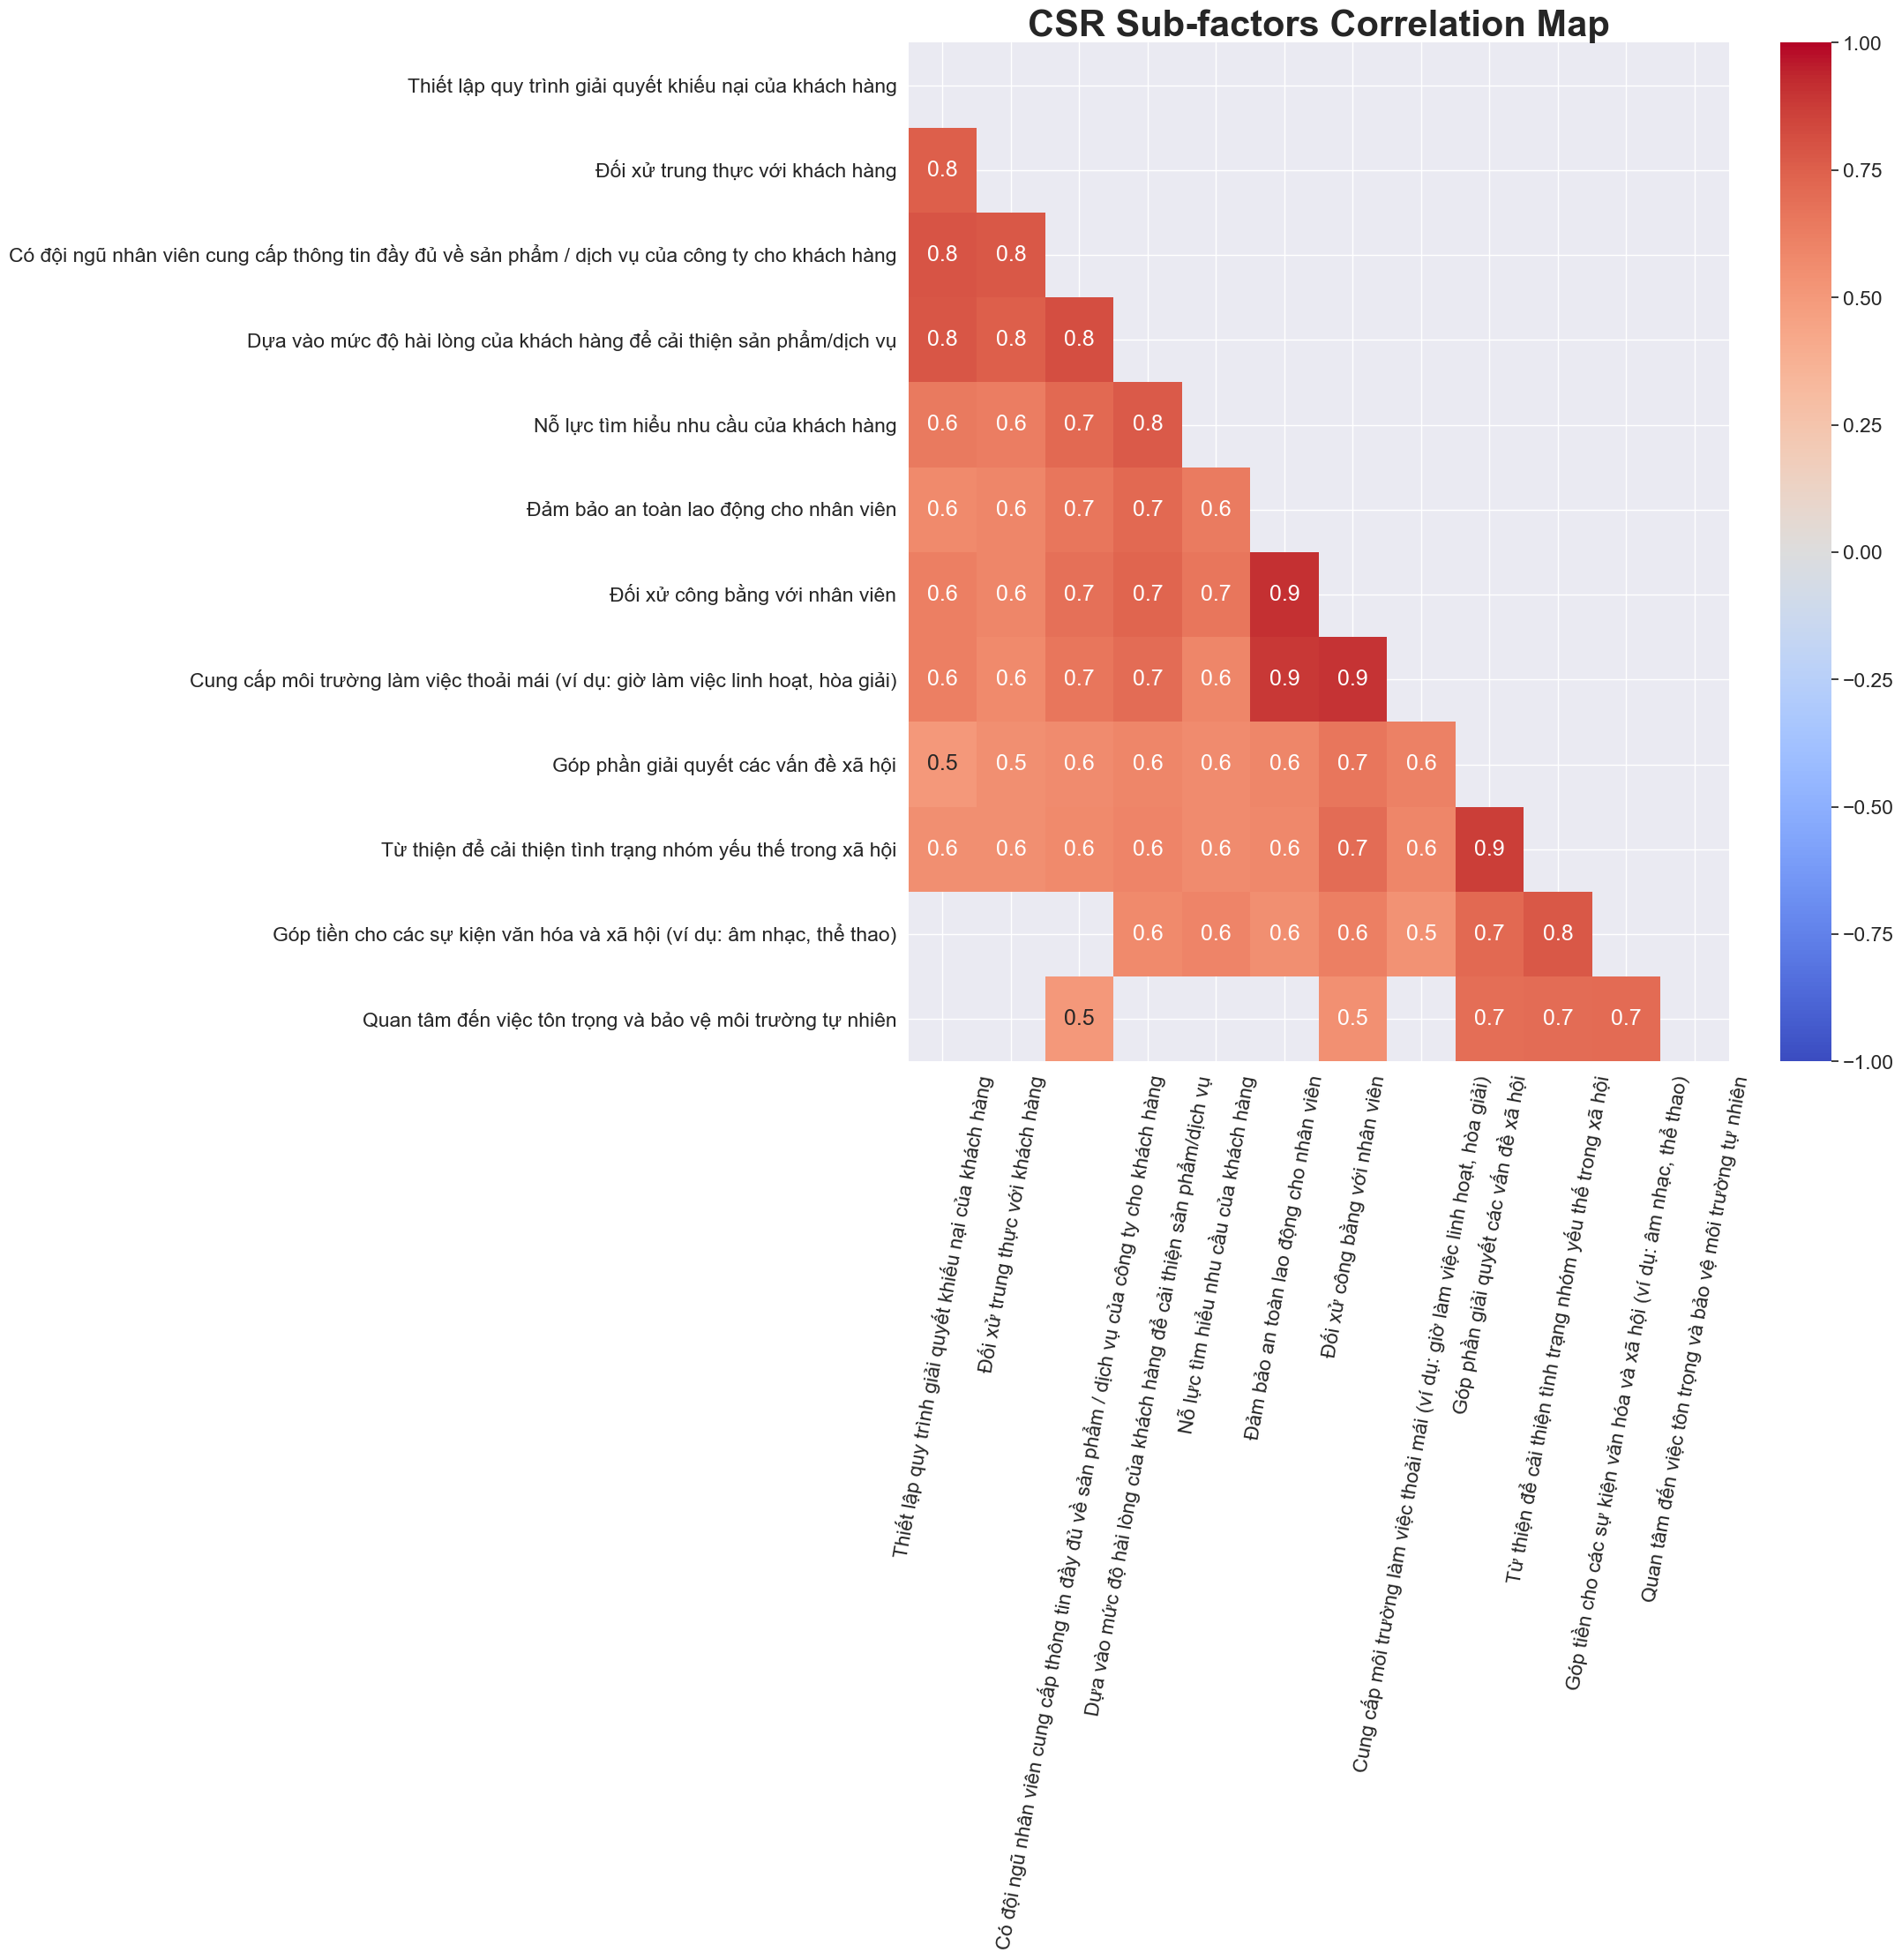

In [553]:
csr_data_corr = csr_data.corr()

threshold = 0.5
high_correlation_df =csr_data_corr[(csr_data_corr >= threshold) | (csr_data_corr <= -threshold)]

sns.set(font_scale=1.5)
plt.figure(figsize=(15,15))
matrix = np.triu(high_correlation_df)
sns.heatmap(high_correlation_df,annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='coolwarm')

plt.xticks(rotation=80)
plt.title('CSR Sub-factors Correlation Map',fontsize=30, fontweight='bold')

In [554]:
csr_melt=csr_data.melt(var_name="Sub-factors",value_name="Mean Values")
csr_melt

Sub-factors  Mean Values
0     Thiết lập quy trình giải quyết khiếu nại của k...          7.0
1     Thiết lập quy trình giải quyết khiếu nại của k...          7.0
2     Thiết lập quy trình giải quyết khiếu nại của k...          5.0
3     Thiết lập quy trình giải quyết khiếu nại của k...          2.0
4     Thiết lập quy trình giải quyết khiếu nại của k...          5.0
...                                                 ...          ...
1231  Quan tâm đến việc tôn trọng và bảo vệ môi trườ...          3.0
1232  Quan tâm đến việc tôn trọng và bảo vệ môi trườ...          5.0
1233  Quan tâm đến việc tôn trọng và bảo vệ môi trườ...          5.0
1234  Quan tâm đến việc tôn trọng và bảo vệ môi trườ...          3.0
1235  Quan tâm đến việc tôn trọng và bảo vệ môi trườ...          3.0

[1236 rows x 2 columns]

In [555]:
import itertools


customer_labels = zip(csr_data.columns[:5], itertools.repeat("Khách hàng"))
employee_labels = zip(csr_data.columns[5:8], itertools.repeat("Nhân viên"))
social_labels = zip(csr_data.columns[8:], itertools.repeat("Xã hội"))

combined = list(customer_labels) + list(employee_labels) + list(social_labels)

print(combined)


[('Thiết lập quy trình giải quyết khiếu nại của khách hàng', 'Khách hàng'), ('Đối xử trung thực với khách hàng', 'Khách hàng'), ('Có đội ngũ nhân viên cung cấp thông tin đầy đủ về sản phẩm / dịch vụ của công ty cho khách hàng', 'Khách hàng'), ('Dựa vào mức độ hài lòng của khách hàng để cải thiện sản phẩm/dịch vụ', 'Khách hàng'), ('Nỗ lực tìm hiểu nhu cầu của khách hàng', 'Khách hàng'), ('Đảm bảo an toàn lao động cho nhân viên', 'Nhân viên'), ('Đối xử công bằng với nhân viên', 'Nhân viên'), ('Cung cấp môi trường làm việc thoải mái (ví dụ: giờ làm việc linh hoạt, hòa giải)', 'Nhân viên'), ('Góp phần giải quyết các vấn đề xã hội', 'Xã hội'), ('Từ thiện để cải thiện tình trạng nhóm yếu thế trong xã hội', 'Xã hội'), ('Góp tiền cho các sự kiện văn hóa và xã hội (ví dụ: âm nhạc, thể thao)', 'Xã hội'), ('Quan tâm đến việc tôn trọng và bảo vệ môi trường tự nhiên', 'Xã hội')]


In [556]:
csr_melt["Main Factors"]=csr_melt["Sub-factors"].map(dict(combined))

col_order(csr_melt,"Main Factors","Sub-factors")
csr_melt.head(10)

Main Factors                                        Sub-factors  Mean Values
0   Khách hàng  Thiết lập quy trình giải quyết khiếu nại của k...          7.0
1   Khách hàng  Thiết lập quy trình giải quyết khiếu nại của k...          7.0
2   Khách hàng  Thiết lập quy trình giải quyết khiếu nại của k...          5.0
3   Khách hàng  Thiết lập quy trình giải quyết khiếu nại của k...          2.0
4   Khách hàng  Thiết lập quy trình giải quyết khiếu nại của k...          5.0
5   Khách hàng  Thiết lập quy trình giải quyết khiếu nại của k...          7.0
6   Khách hàng  Thiết lập quy trình giải quyết khiếu nại của k...          6.0
7   Khách hàng  Thiết lập quy trình giải quyết khiếu nại của k...          6.0
8   Khách hàng  Thiết lập quy trình giải quyết khiếu nại của k...          6.0
9   Khách hàng  Thiết lập quy trình giải quyết khiếu nại của k...          4.0

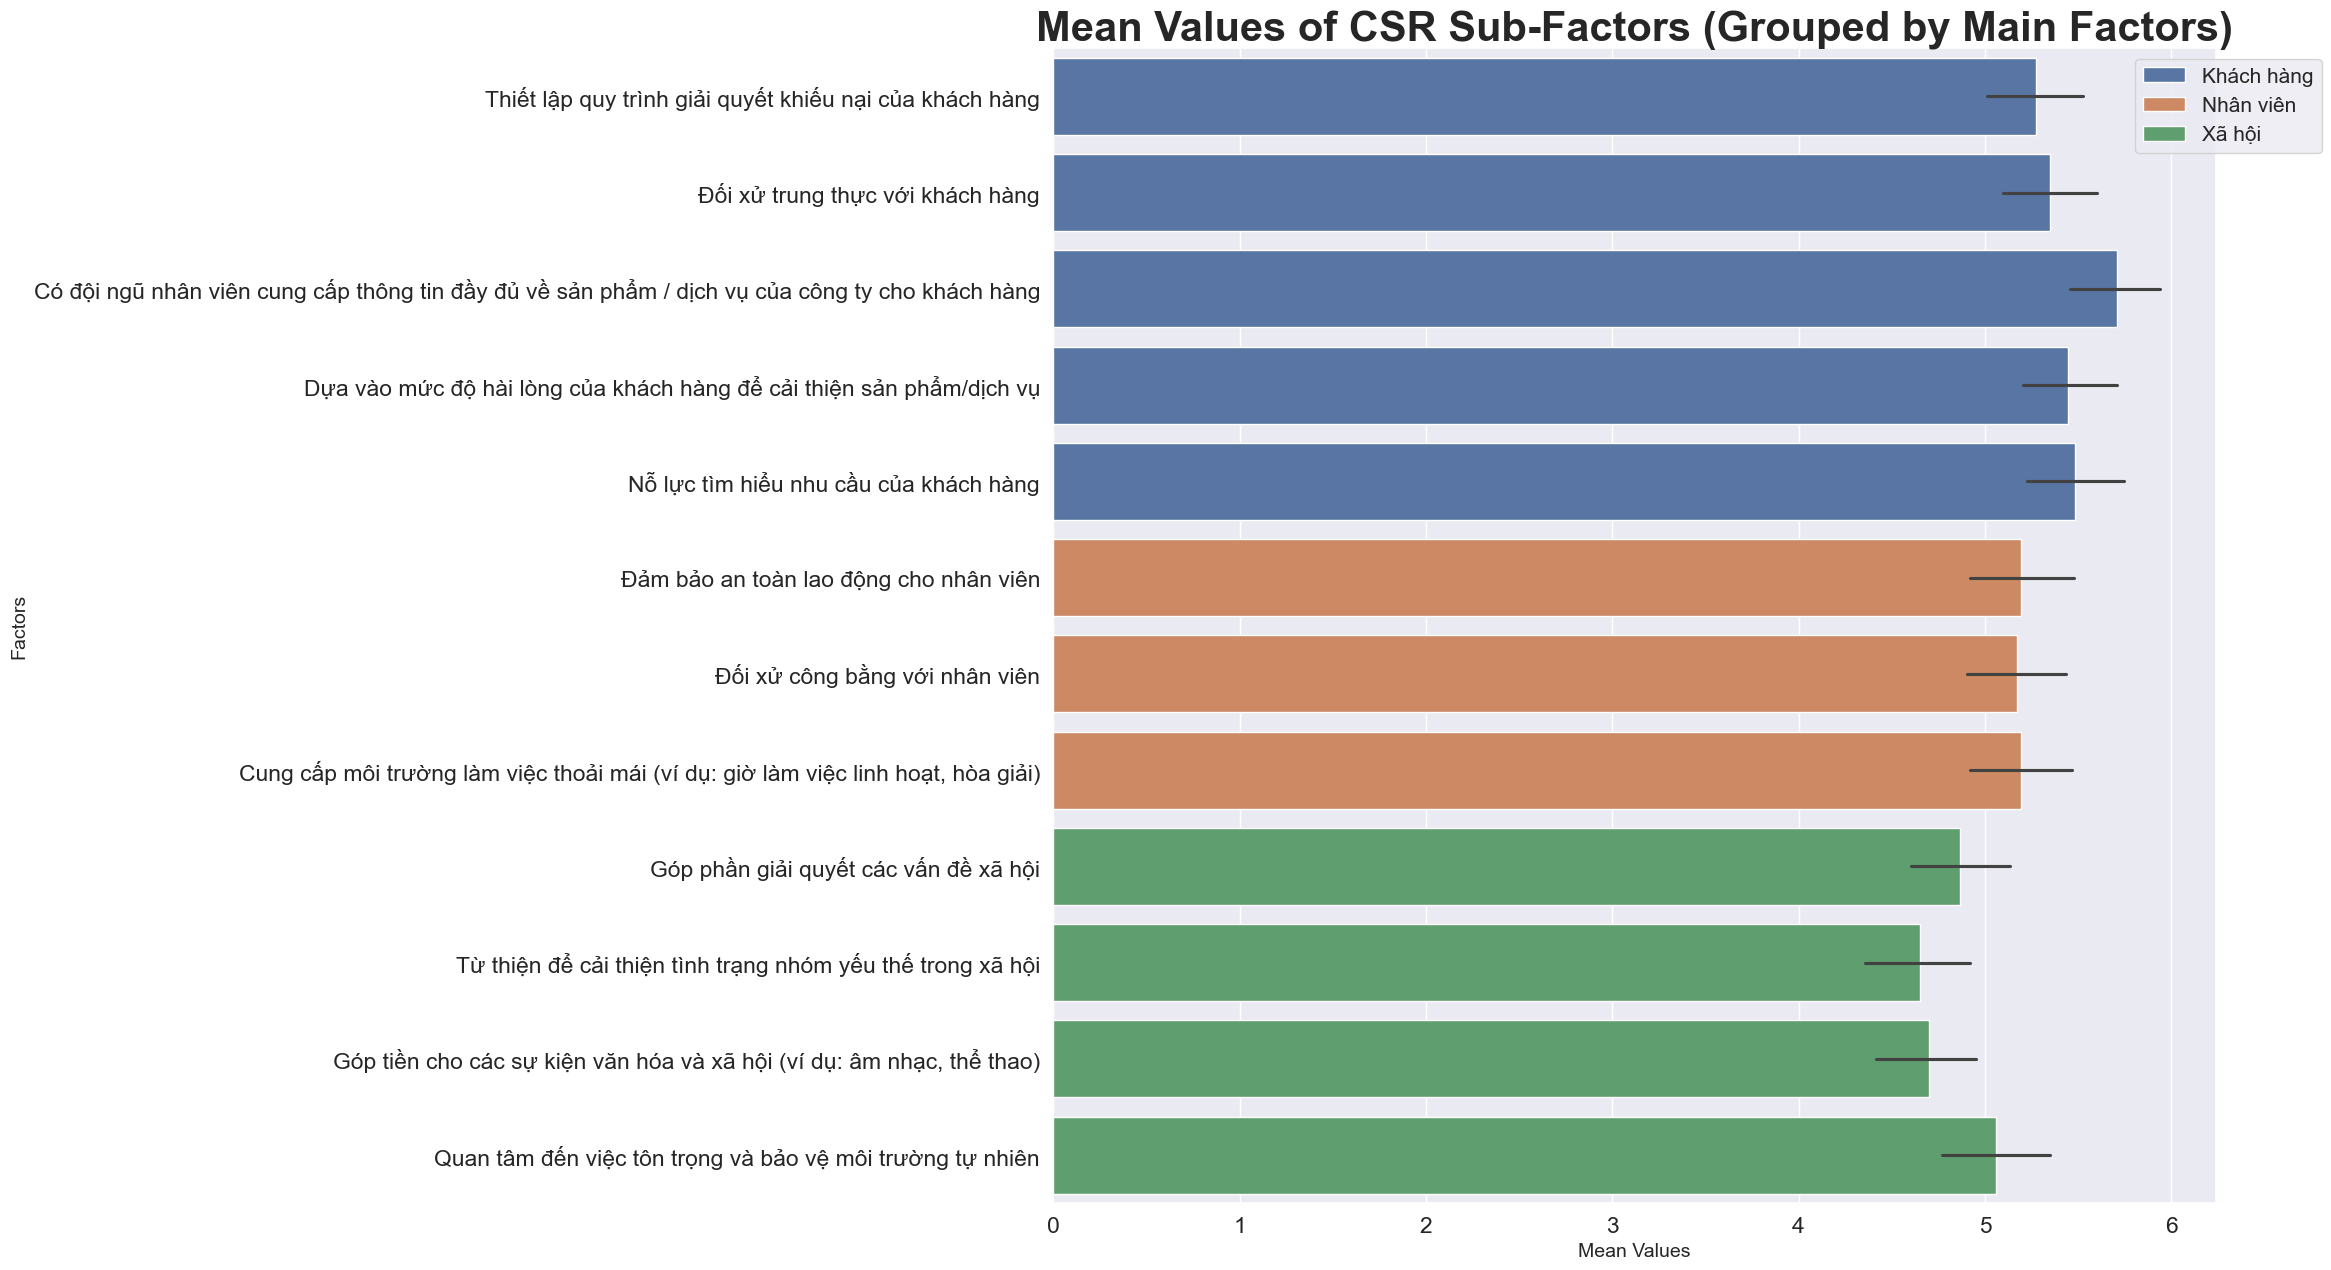

In [557]:
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.5)

sns.barplot(data=csr_melt,y="Sub-factors",orient="h",x="Mean Values",hue="Main Factors")

plt.xlabel('Mean Values', fontsize=14)
plt.ylabel('Factors', fontsize=14)
plt.title('Mean Values of CSR Sub-Factors (Grouped by Main Factors)', fontsize=30, fontweight="bold")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), fontsize=15)

plt.show()

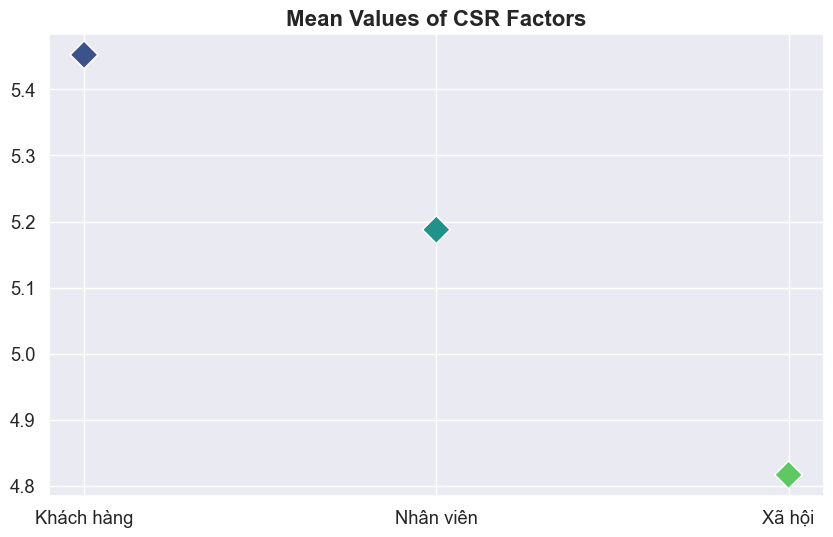

In [558]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)

csr_melt_avg = csr_melt.groupby("Main Factors")["Mean Values"].mean().reset_index()

sns.scatterplot(data=csr_melt_avg,x="Main Factors",y="Mean Values", hue="Main Factors", marker="D", s=200, palette='viridis')

plt.xlabel("")
plt.ylabel("")
plt.title('Mean Values of CSR Factors', fontsize=16, fontweight="bold")
plt.legend().remove()

plt.show()


In [559]:
csr_melt.groupby("Main Factors")["Mean Values"].mean().reset_index()


Main Factors  Mean Values
0   Khách hàng     5.452427
1    Nhân viên     5.187702
2       Xã hội     4.816626

In [560]:
csr_data["Quan tâm đến việc tôn trọng và bảo vệ môi trường tự nhiên"].fillna(csr_data["Quan tâm đến việc tôn trọng và bảo vệ môi trường tự nhiên"].median(),inplace=True)

csr_main_fact = pd.DataFrame(None,columns=['Khách Hàng', 'Nhân viên', 'Xã hội'])

csr_main_fact["Khách Hàng"] = csr_data.iloc[:,:6].apply(lambda row: float(f"{row.mean():.2f}"),axis=1)
csr_main_fact["Nhân viên"] = csr_data.iloc[:,6:9].apply(lambda row: float(f"{row.mean():.2f}"),axis=1)
csr_main_fact["Xã hội"] = csr_data.iloc[:, 9:12].apply(lambda row: float(f"{row.mean():.2f}"), axis=1)

C:\Users\ACER\AppData\Local\Temp\ipykernel_57028\2242212255.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [561]:
outlier_check(csr_main_fact)

Summary Statistics:
+------------+-------+-------------------+--------------------+------+-------+-----+-------+-----+
|            | count |       mean        |        std         | min  |  25%  | 50% |  75%  | max |
+------------+-------+-------------------+--------------------+------+-------+-----+-------+-----+
| Khách Hàng | 103.0 | 5.409611650485437 | 1.1738623381310704 | 2.0  | 4.585 | 5.5 | 6.33  | 7.0 |
| Nhân viên  | 103.0 | 5.077766990291262 | 1.2661071509644062 | 2.67 |  4.0  | 5.0 | 6.165 | 7.0 |
|   Xã hội   | 103.0 | 4.802718446601942 |  1.31052615849794  | 2.0  |  4.0  | 5.0 |  6.0  | 7.0 |
+------------+-------+-------------------+--------------------+------+-------+-----+-------+-----+




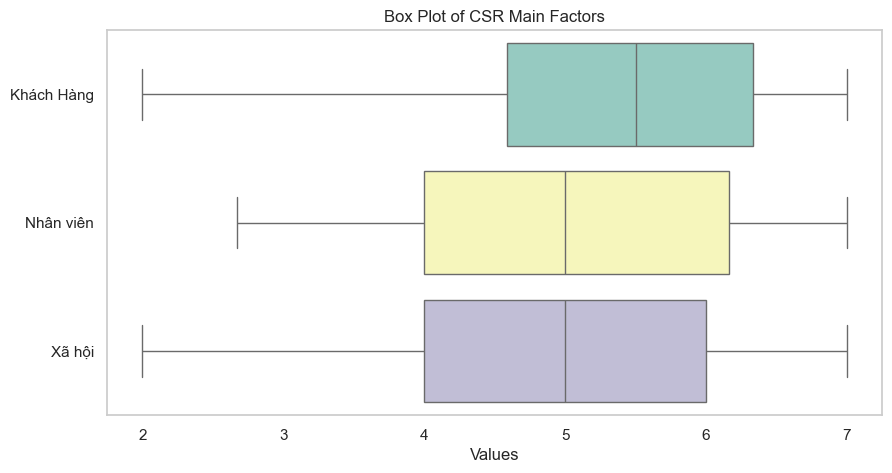

In [562]:
sns.set(style="whitegrid",font_scale=1)

plt.figure(figsize=(10, 5))
sns.boxplot(data=csr_main_fact, orient="h", palette="Set3")

plt.grid(False)
plt.title("Box Plot of CSR Main Factors")
plt.xlabel("Values")

plt.show()

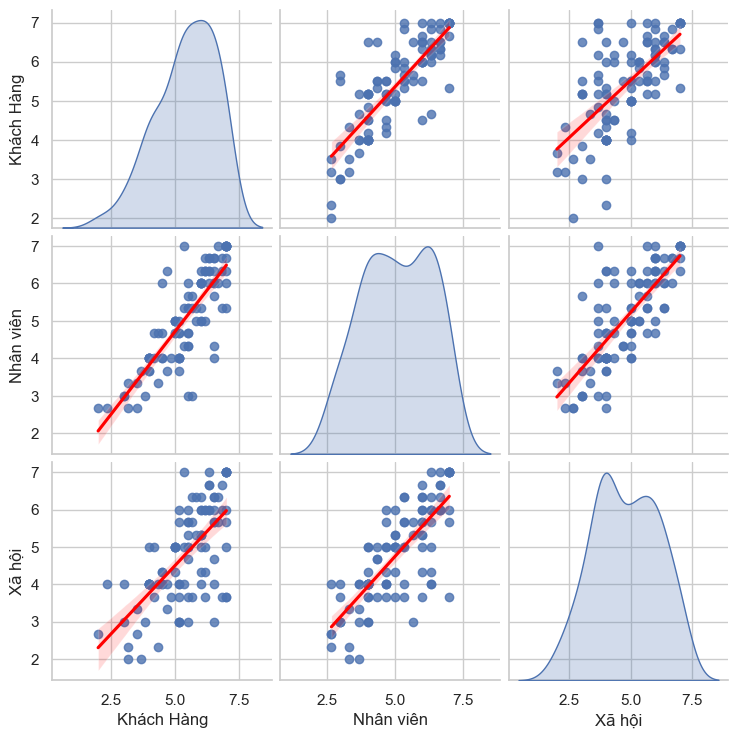

In [563]:
sns.pairplot(csr_main_fact,kind="reg",diag_kind="kde",plot_kws={"line_kws":{"color":"red"}})

# II. Phân tích dữ liệu thống kê

In [564]:
vcc_csr = csr_main_fact.rename(columns=lambda x: f"csr_{x}").merge(vcc_averages.rename(columns=lambda x: f"vcc_{x}"),how="inner",left_index=True,right_index=True)
vcc_csr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   csr_Khách Hàng                        103 non-null    float64
 1   csr_Nhân viên                         103 non-null    float64
 2   csr_Xã hội                            103 non-null    float64
 3   vcc_Tìm kiếm thông tin                103 non-null    float64
 4   vcc_Chia sẻ thông tin                 103 non-null    float64
 5   vcc_thực hiện Hành vi có trách nhiệm  103 non-null    float64
 6   vcc_Tương tác cá nhân                 103 non-null    float64
 7   vcc_Phản hồi                          103 non-null    float64
 8   vcc_Ủng hộ                            103 non-null    float64
 9   vcc_Giúp đỡ                           103 non-null    float64
 10  vcc_Kiên nhẫn                         103 non-null    float64
dtypes: float64(11)
memo

In [565]:
vcc_csr.head()

csr_Khách Hàng  csr_Nhân viên  csr_Xã hội  vcc_Tìm kiếm thông tin  \
0            5.50           4.33        3.67                5.333333   
1            5.33           5.33        4.00                5.333333   
2            6.00           5.00        5.33                3.333333   
3            3.50           2.67        2.67                2.666667   
4            5.00           5.00        5.00                5.000000   

   vcc_Chia sẻ thông tin  vcc_thực hiện Hành vi có trách nhiệm  \
0               7.000000                              7.000000   
1               7.000000                              7.000000   
2               5.666667                              6.333333   
3               1.666667                              4.000000   
4               5.000000                              6.000000   

   vcc_Tương tác cá nhân  vcc_Phản hồi  vcc_Ủng hộ  vcc_Giúp đỡ  vcc_Kiên nhẫn  
0                    7.0      4.666667    7.000000     4.666667       4.000000  
1                    7.0      4.666667    3.333333     2.000000       1.666667  
2                    7.0      3.000000    3.333333     3.333333       6.000000  
3                    4.0      2.333333    2.333333     2.000000       3.000000  
4                    7.0      6.000000    6.000000     6.000000       6.000000

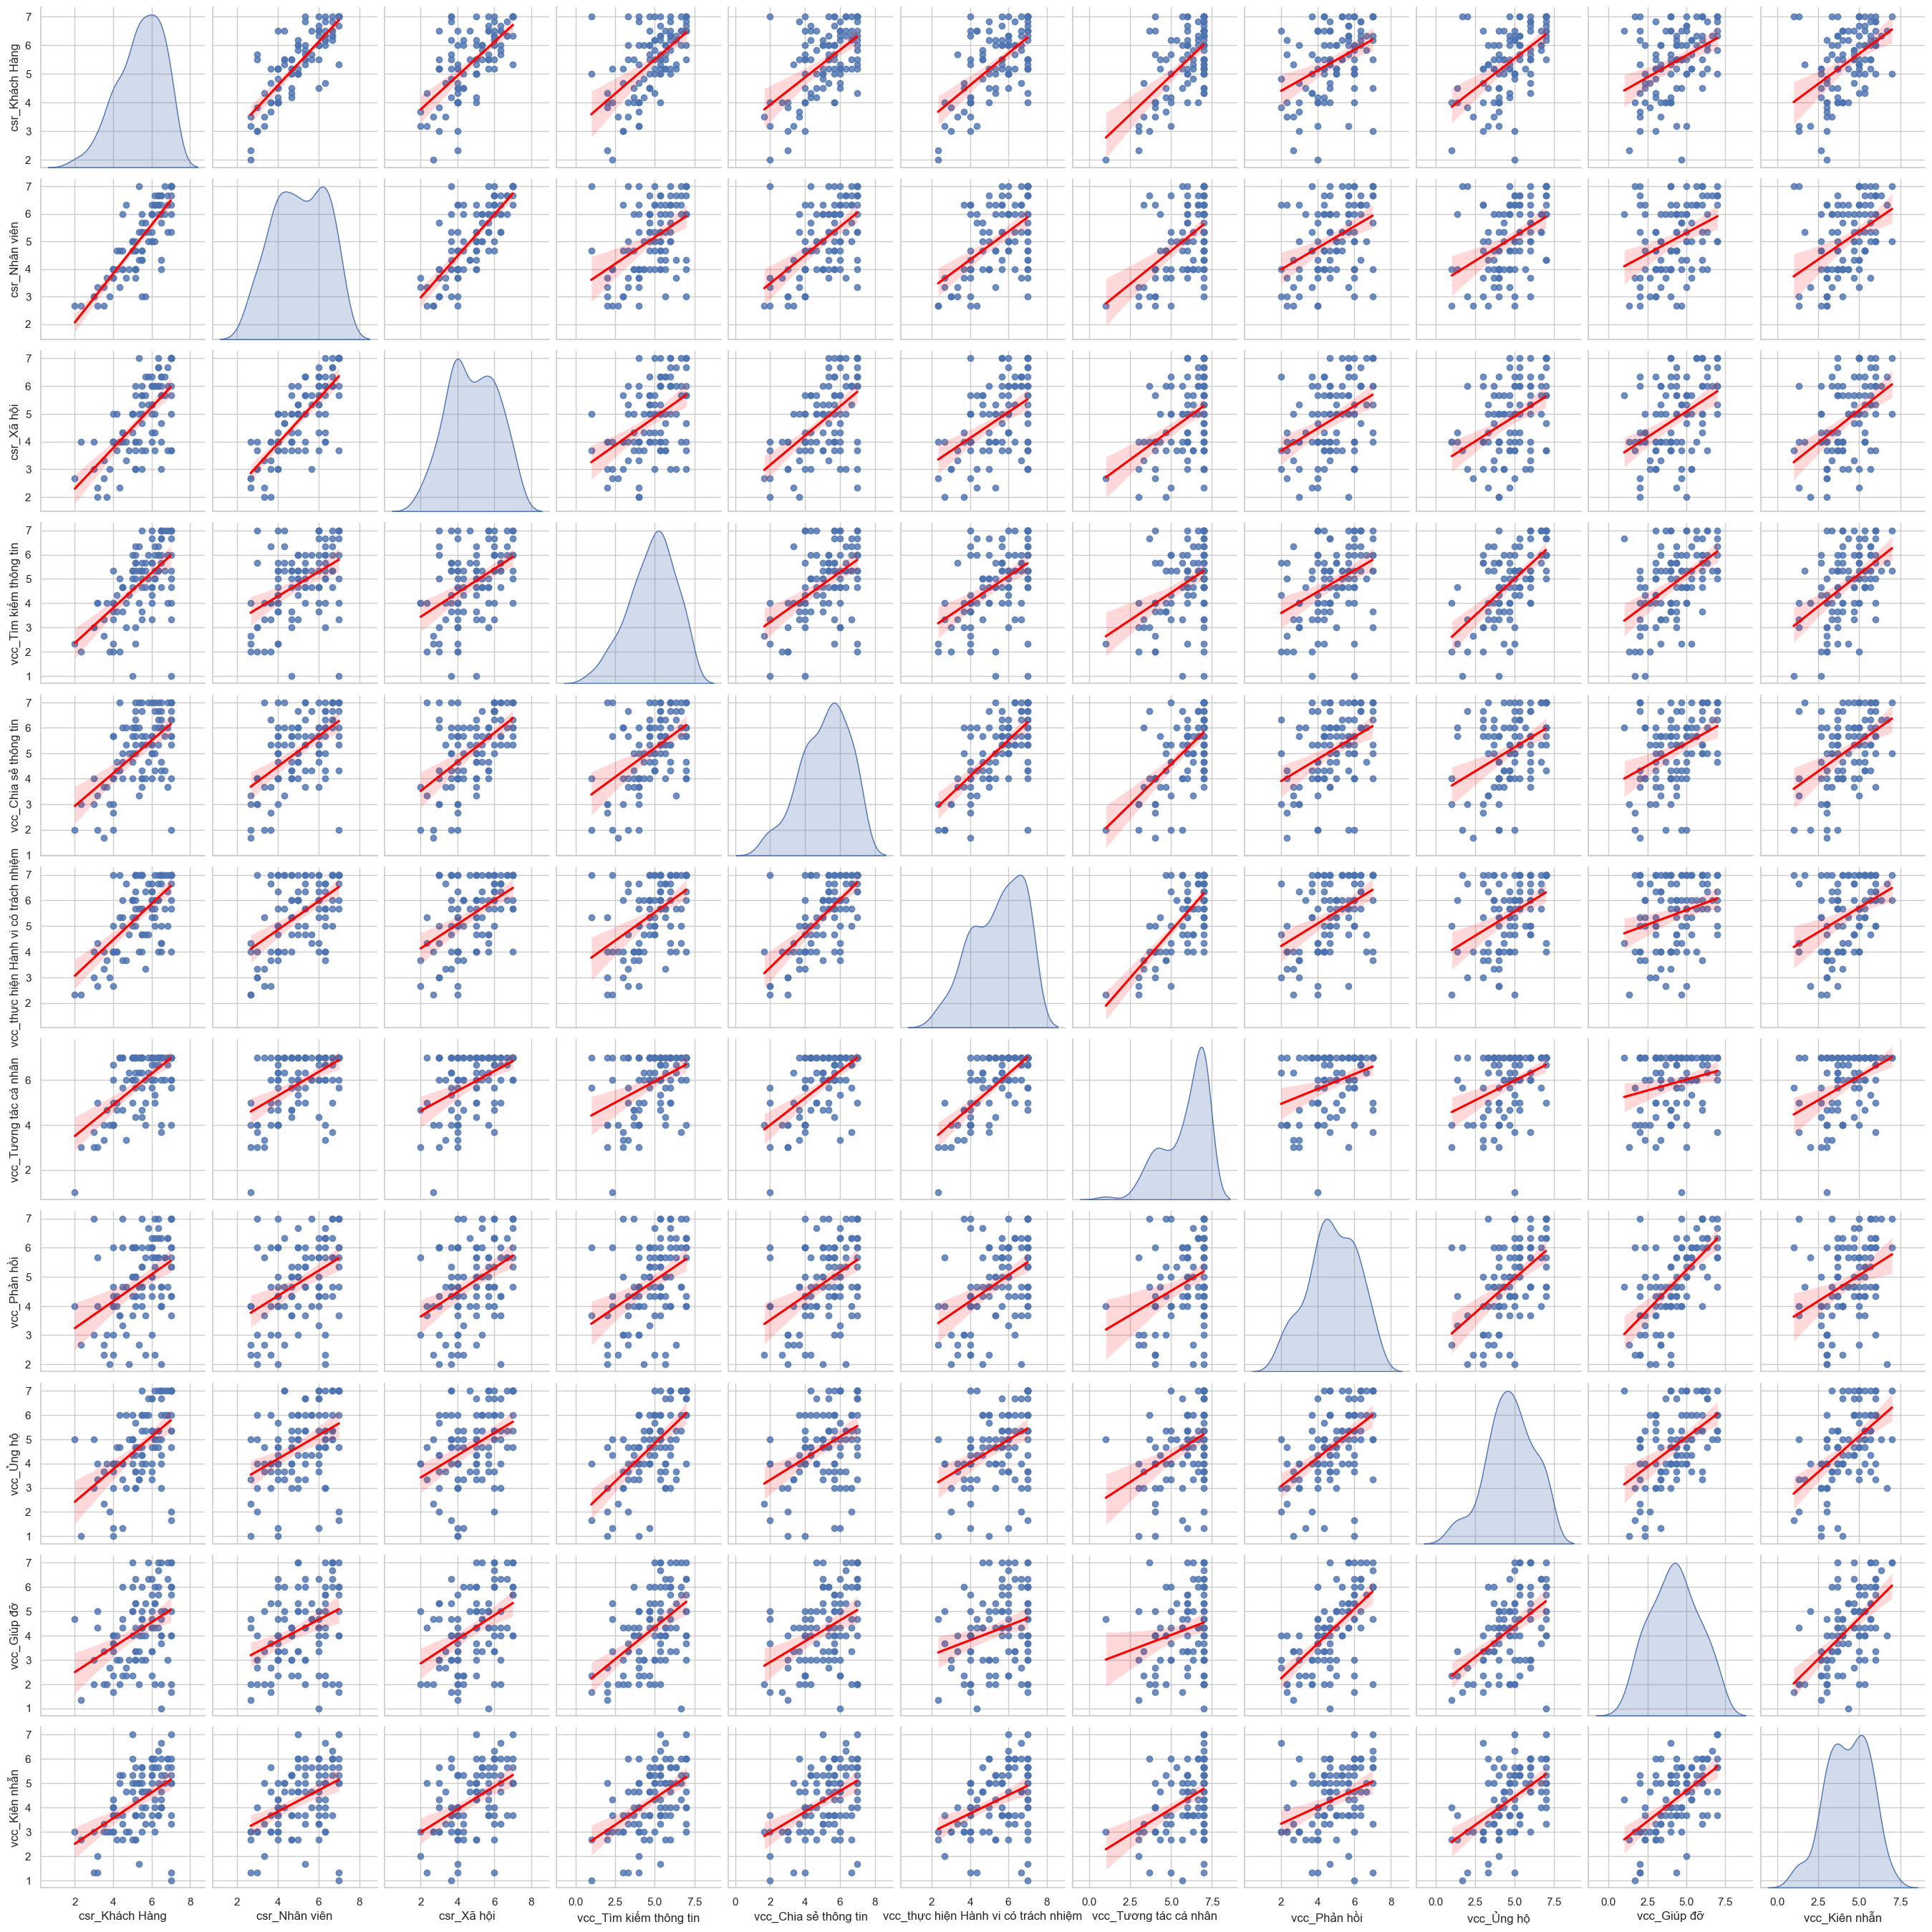

In [566]:
sns.pairplot(vcc_csr,kind="reg",diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})

Text(0.5, 1.0, 'Correlation Map')

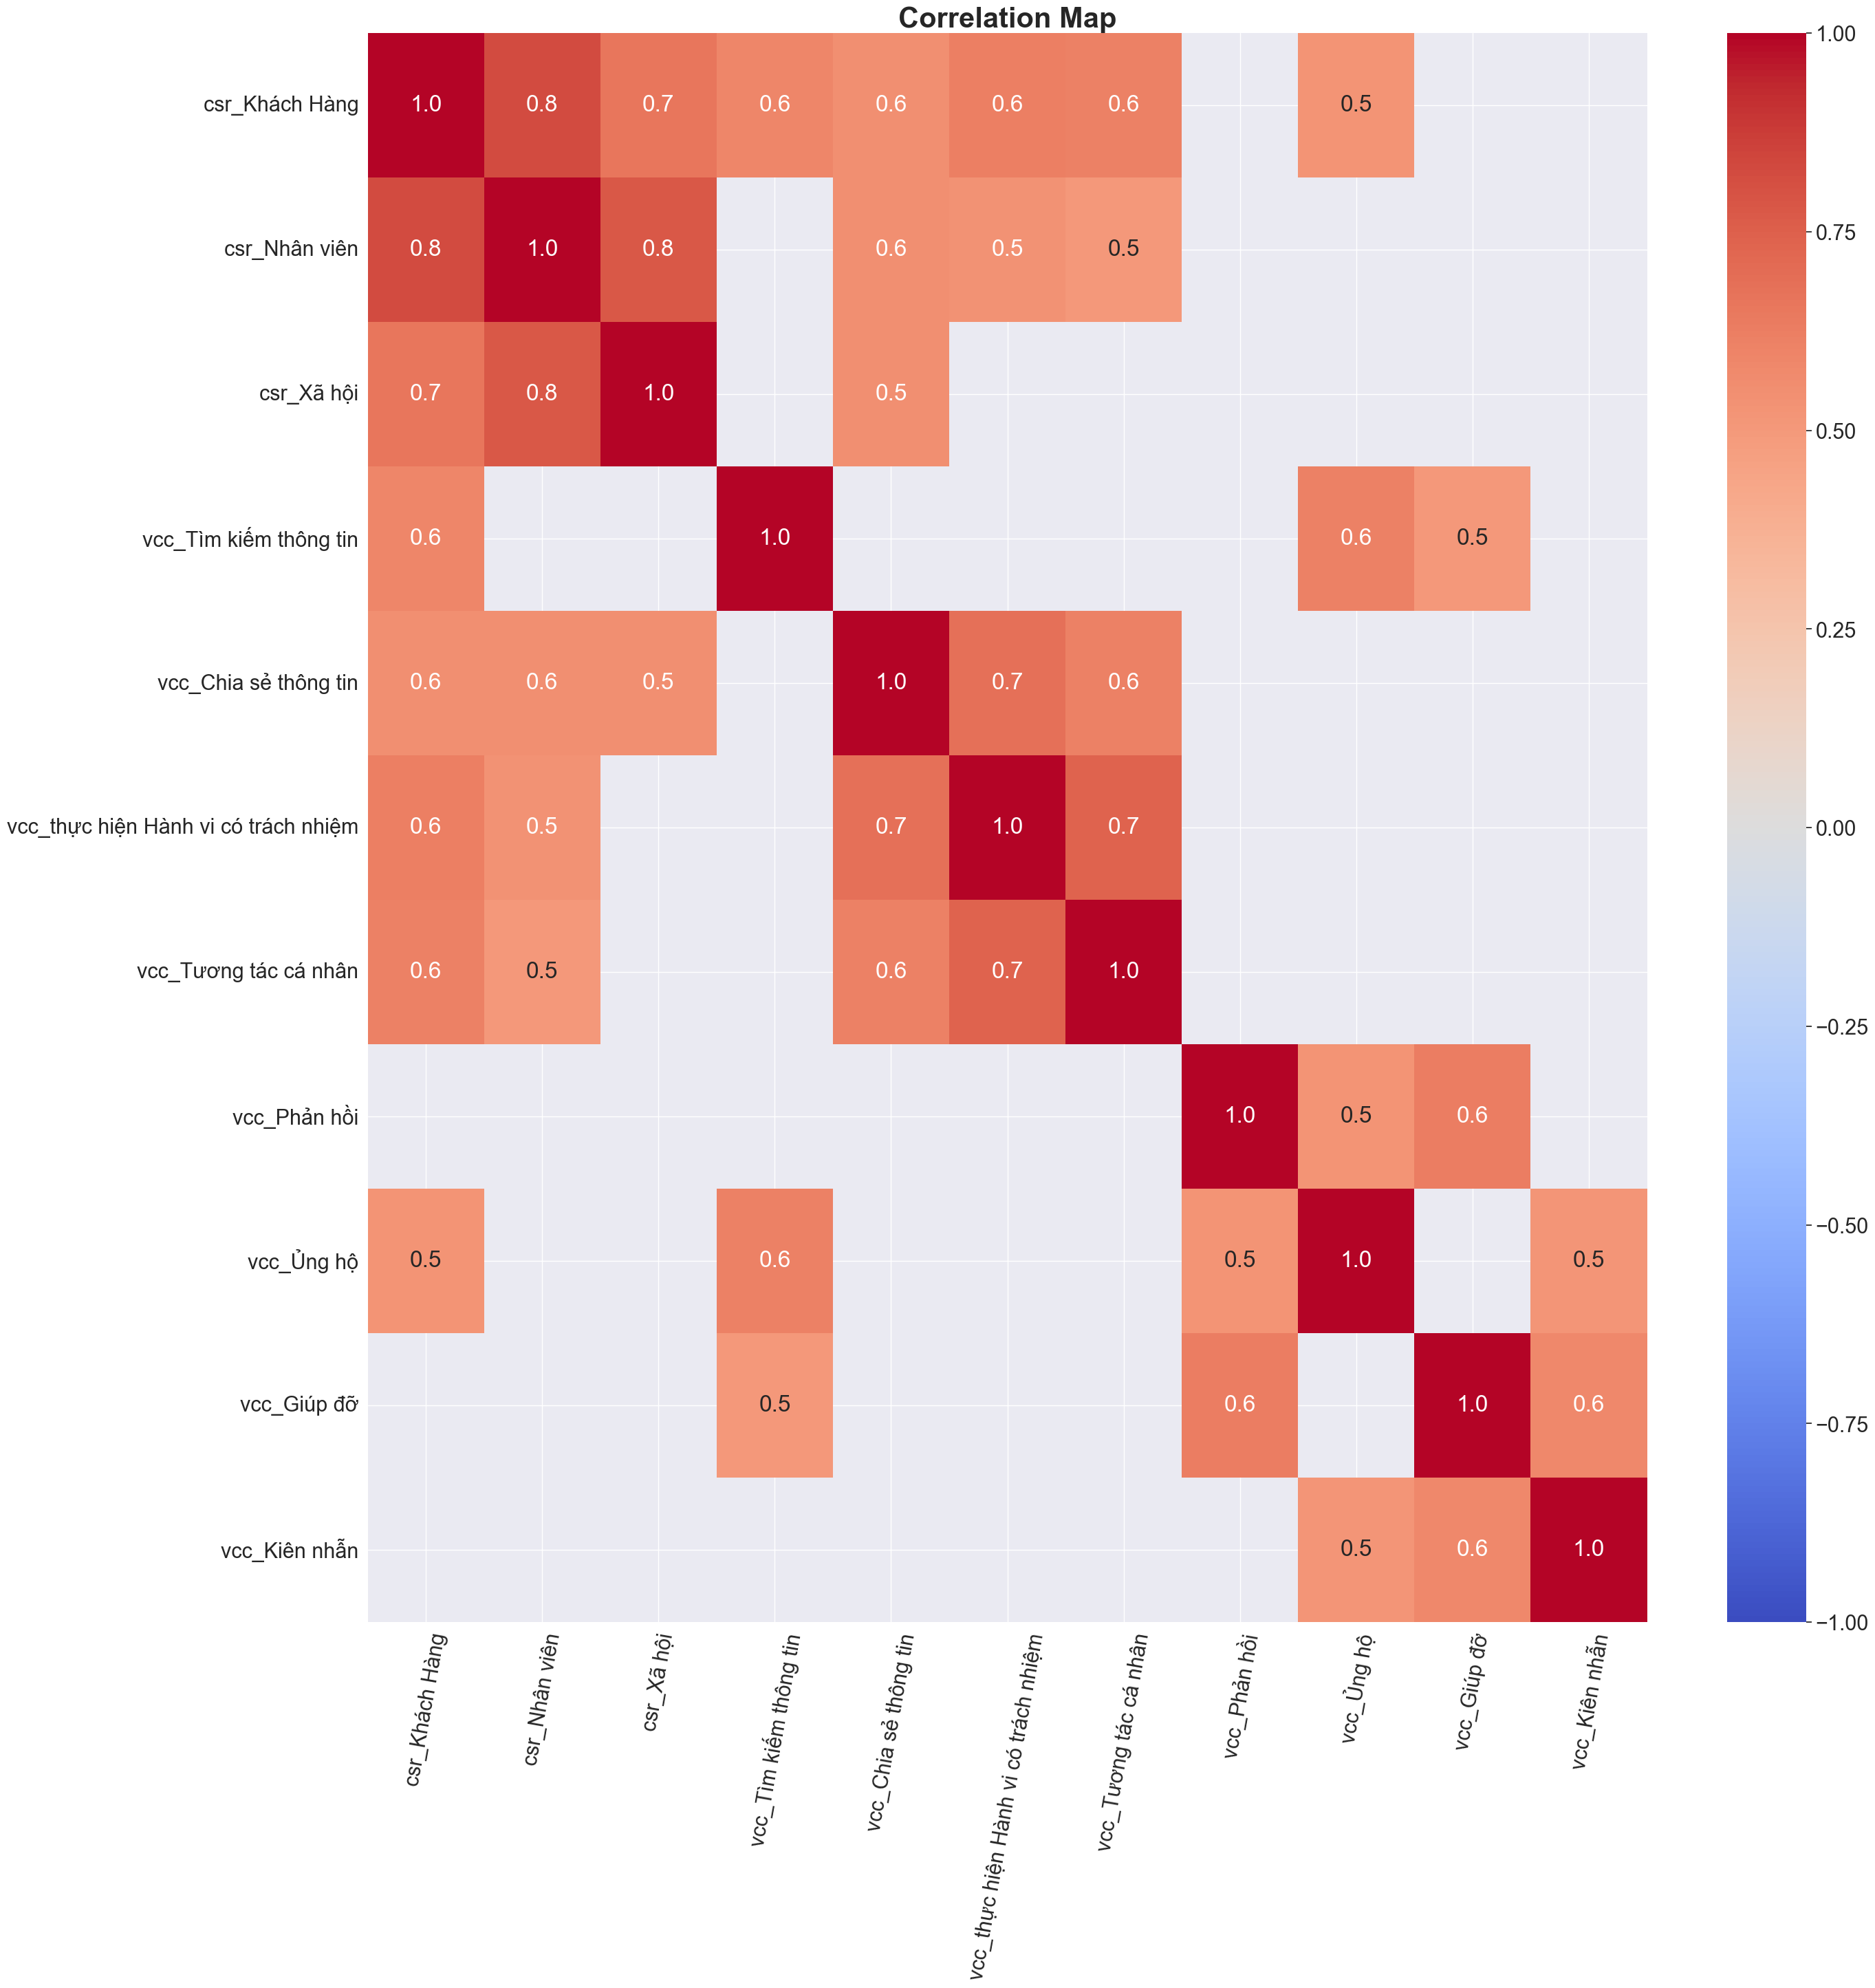

In [567]:
vcc_csr_corr = vcc_csr.corr()

threshold = 0.5
high_correlation_df = vcc_csr_corr[(vcc_csr_corr >= threshold) | (vcc_csr_corr <= -threshold)]

sns.set(font_scale=2)
plt.figure(figsize=(30,30))
matrix = np.triu(high_correlation_df)
sns.heatmap(high_correlation_df,annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm')

plt.xticks(rotation=80)
plt.title('Correlation Map',fontsize=30, fontweight='bold')

In [568]:
vcc_csr.head()

csr_Khách Hàng  csr_Nhân viên  csr_Xã hội  vcc_Tìm kiếm thông tin  \
0            5.50           4.33        3.67                5.333333   
1            5.33           5.33        4.00                5.333333   
2            6.00           5.00        5.33                3.333333   
3            3.50           2.67        2.67                2.666667   
4            5.00           5.00        5.00                5.000000   

   vcc_Chia sẻ thông tin  vcc_thực hiện Hành vi có trách nhiệm  \
0               7.000000                              7.000000   
1               7.000000                              7.000000   
2               5.666667                              6.333333   
3               1.666667                              4.000000   
4               5.000000                              6.000000   

   vcc_Tương tác cá nhân  vcc_Phản hồi  vcc_Ủng hộ  vcc_Giúp đỡ  vcc_Kiên nhẫn  
0                    7.0      4.666667    7.000000     4.666667       4.000000  
1                    7.0      4.666667    3.333333     2.000000       1.666667  
2                    7.0      3.000000    3.333333     3.333333       6.000000  
3                    4.0      2.333333    2.333333     2.000000       3.000000  
4                    7.0      6.000000    6.000000     6.000000       6.000000

In [569]:
vcc_csr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   csr_Khách Hàng                        103 non-null    float64
 1   csr_Nhân viên                         103 non-null    float64
 2   csr_Xã hội                            103 non-null    float64
 3   vcc_Tìm kiếm thông tin                103 non-null    float64
 4   vcc_Chia sẻ thông tin                 103 non-null    float64
 5   vcc_thực hiện Hành vi có trách nhiệm  103 non-null    float64
 6   vcc_Tương tác cá nhân                 103 non-null    float64
 7   vcc_Phản hồi                          103 non-null    float64
 8   vcc_Ủng hộ                            103 non-null    float64
 9   vcc_Giúp đỡ                           103 non-null    float64
 10  vcc_Kiên nhẫn                         103 non-null    float64
dtypes: float64(11)
memo

In [570]:
from sklearn import linear_model
import statsmodels.api as sm

## MÔ HÌNH MULTIVARIATE OLS (Linear Regression)

### 1. Dependent Variable: CSR về Khách Hàng

In [571]:
x=vcc_csr.iloc[:,3:] # all VCC factors
y=vcc_csr.iloc[:,0] # Perception về Khách Hàng CSR as Dependent Variable

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# Using statsmodels

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.1397566647495205
Coefficients: 
 [ 0.17995189  0.04416383  0.18437651  0.22111849 -0.00875461  0.10655698
  0.0490055   0.04728108]
                            OLS Regression Results                            
Dep. Variable:         csr_Khách Hàng   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     14.93
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           6.61e-14
Time:                        02:17:35   Log-Likelihood:                -119.93
No. Observations:                 103   AIC:                             257.9
Df Residuals:                      94   BIC:                             281.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err     

### 2. Dependent Variable: CSR về Nhân Viên

In [572]:
x=vcc_csr.iloc[:,3:] # all VCC factors
y=vcc_csr.iloc[:,1] # Perception về Nhân Viên CSR as Dependent Variable

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# Using statsmodels

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.0569267091615133
Coefficients: 
 [0.07074742 0.20681299 0.1268583  0.12725748 0.10003562 0.03897161
 0.02121461 0.09900207]
                            OLS Regression Results                            
Dep. Variable:          csr_Nhân viên   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     8.248
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           2.11e-08
Time:                        02:17:35   Log-Likelihood:                -142.57
No. Observations:                 103   AIC:                             303.1
Df Residuals:                      94   BIC:                             326.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t  

### 3. Dependent Variable: CSR về Xã Hội

In [573]:
x=vcc_csr.iloc[:,3:] # all VCC factors
y=vcc_csr.iloc[:,1] # Perception về Xã Hội CSR as Dependent Variable

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# Using statsmodels

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1.0569267091615133
Coefficients: 
 [0.07074742 0.20681299 0.1268583  0.12725748 0.10003562 0.03897161
 0.02121461 0.09900207]
                            OLS Regression Results                            
Dep. Variable:          csr_Nhân viên   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     8.248
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           2.11e-08
Time:                        02:17:35   Log-Likelihood:                -142.57
No. Observations:                 103   AIC:                             303.1
Df Residuals:                      94   BIC:                             326.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t  